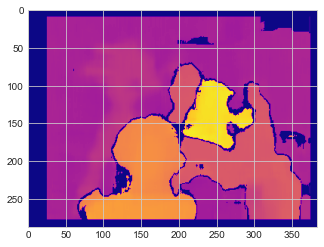

In [111]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
left = cv2.imread(r"C:\Users\Angel\computer-vision\3D\Disparity\imgs\tsukuba_l.png", cv2.IMREAD_GRAYSCALE)
right = cv2.imread(r"C:\Users\Angel\computer-vision\3D\Disparity\imgs\tsukuba_r.png", cv2.IMREAD_GRAYSCALE)

block_size = 21  # Size of the block to match
h, w = left.shape
disparity_map = np.zeros((h, w), np.float32)

half_block = block_size // 2
pad = half_block
# Pad images to handle borders
left_pad_block = cv2.copyMakeBorder(left, half_block, half_block, half_block, half_block, cv2.BORDER_CONSTANT, value=0)
right_pad_block = cv2.copyMakeBorder(right, half_block, half_block, half_block, half_block, cv2.BORDER_CONSTANT, value=0)


imgL = left
imgR = right

stereo = cv2.StereoBM.create(numDisparities=16, blockSize=block_size)
disparity = stereo.compute(imgL,imgR)
# disparity = disparity[pad:pad+h, pad:pad+w]
plt.imshow(disparity,'plasma')
plt.show()

Text(0.5, 1.0, 'Disparity (no black border)')

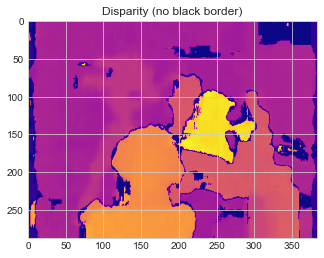

In [41]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

numDisparities = 16
blockSize = 15
half_block = block_size // 2
pad = half_block

# Pad images to handle borders
left_pad_block = cv2.copyMakeBorder(left, half_block, half_block, half_block, half_block, cv2.BORDER_CONSTANT, value=0)
right_pad_block = cv2.copyMakeBorder(right, half_block, half_block, half_block, half_block, cv2.BORDER_CONSTANT, value=0)


# Add horizontal padding to avoid black borders in disparity map
pad_disp = numDisparities
left_pad_disp = cv2.copyMakeBorder(left_pad_block, 0, 0, pad_disp, pad_disp, cv2.BORDER_CONSTANT, value=0)
right_pad_disp = cv2.copyMakeBorder(right_pad_block, 0, 0, pad_disp, pad_disp, cv2.BORDER_CONSTANT, value=0)

stereo = cv.StereoBM.create(numDisparities=numDisparities, blockSize=blockSize)
disparity_full = stereo.compute(left_pad_disp, right_pad_disp)

# Crop back to original size
h, w = left.shape
disparity_bm = disparity_full[pad:pad+h, pad_disp+pad:pad_disp+pad+w]

plt.imshow(disparity_bm, 'plasma')
plt.title("Disparity (no black border)")

Computing disparity map...


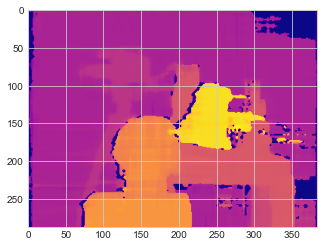

In [42]:
import cv2
import numpy as np

# --- This is a simplified example. In a real application, you would load
# --- your calibration and rectification data from a file. ---

# Assume left_image and right_image are loaded and are grayscale uint8
# Assume they have already been rectified.

# --- StereoSGBM Parameter Configuration ---
# These parameters are highly dependent on your specific camera setup and scene.
# Tuning them is key to getting good results.

# A larger window_size means more robust to textureless areas, but less detail.
blockSize = 3 

min_disp = 0  # Minimum possible disparity value. Usually 0.
# num_disp must be divisible by 16. It is the max disparity - min disparity.
numDisparities = 16 * 1 # 96 pixels

half_block = block_size // 2
pad = half_block

# Pad images to handle borders
left_pad_block = cv2.copyMakeBorder(left, half_block, half_block, half_block, half_block, cv2.BORDER_CONSTANT, value=0)
right_pad_block = cv2.copyMakeBorder(right, half_block, half_block, half_block, half_block, cv2.BORDER_CONSTANT, value=0)


# Add horizontal padding to avoid black borders in disparity map
pad_disp = numDisparities
left_pad_disp = cv2.copyMakeBorder(left_pad_block, 0, 0, pad_disp, pad_disp, cv2.BORDER_CONSTANT, value=0)
right_pad_disp = cv2.copyMakeBorder(right_pad_block, 0, 0, pad_disp, pad_disp, cv2.BORDER_CONSTANT, value=0)

stereo = cv2.StereoSGBM_create(
    minDisparity=min_disp,
    numDisparities=numDisparities,
    blockSize=blockSize,
    P1=8 * 3 * blockSize**2,     # Penalty for small disparity changes
    P2=32 * 3 * blockSize**2,    # Penalty for large disparity changes
    disp12MaxDiff=1,               # Max allowed difference in left-right disparity check
    uniquenessRatio=15,            # Margin by which the best-matching disparity must win
    speckleWindowSize=100,         # Size of speckle regions to filter
    speckleRange=32,               # Disparity variation allowed within a speckle
    mode=cv2.STEREO_SGBM_MODE_SGBM_3WAY # Use 3-way SGBM for better performance
)

print("Computing disparity map...")
disparity_map = stereo.compute(left_pad_disp, right_pad_disp).astype(np.float32)
h, w = left.shape
disparity_sgbm = disparity_map[pad:pad+h, pad_disp+pad:pad_disp+pad+w]

plt.imshow(disparity_sgbm, 'plasma')
# The raw output is a 16-bit signed integer (CV_16S). 
# It needs to be divided by 16 to get the true disparity values.
# Invalid disparities will have a value less than or equal to min_disp.

# You can then normalize for visualization
# disparity_visual = cv2.normalize(disparity_map, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# cv2.imshow('Disparity', disparity_visual)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

Text(0.5, 1.0, 'Ground Truth Disparity')

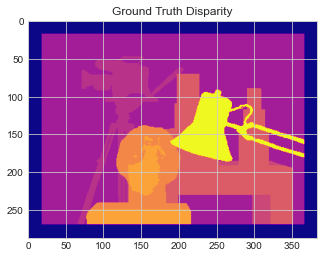

In [67]:
gt_disp = cv2.imread(r"C:\Users\Angel\computer-vision\3D\Disparity\imgs\tsukuba-truedispL.png", cv.IMREAD_GRAYSCALE)
plt.imshow(gt_disp, 'plasma')
plt.title("Ground Truth Disparity")


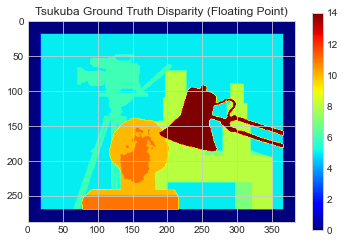

Original max value: 224
Floating-point max value: 14.0


In [70]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the ground truth disparity map (e.g., truedisp.row1.col3.pgm)
# The image will be loaded as an integer array (e.g., dtype=uint8)
gt_disp_int = cv2.imread(r"C:\Users\Angel\computer-vision\3D\Disparity\imgs\tsukuba-truedispL.png", cv2.IMREAD_GRAYSCALE)

# Convert to floating-point and scale down
# This is the crucial step
gt_disp_float = gt_disp_int.astype(np.float32) / 16.0

# Now gt_disp_float contains the true disparity values
# For example, a pixel with intensity 80 in the image file
# now has a value of 5.0 in the float array.

# You can visualize it if you want
plt.imshow(gt_disp_float, cmap='jet')
plt.colorbar()
plt.title("Tsukuba Ground Truth Disparity (Floating Point)")
plt.show()

print(f"Original max value: {gt_disp_int.max()}")
print(f"Floating-point max value: {gt_disp_float.max()}")

In [44]:
import cv2
import numpy as np
from typing import Optional

def overlay_disparity_on_image(
    bgr_img: np.ndarray,
    disparity_map: np.ndarray,
    alpha: float = 0.6,
    colormap: int = cv2.COLORMAP_JET
) -> Optional[np.ndarray]:
    """
    Overlays a disparity map onto its corresponding grayscale image for visualization.

    Args:
        grayscale_image: The original single-channel grayscale image (uint8).
        disparity_map: The single-channel disparity map (can be any numeric type).
        alpha: The weighting for the grayscale image. The disparity overlay will have
               a weight of (1 - alpha). Value should be between 0.0 and 1.0.
        colormap: The OpenCV colormap to apply to the disparity map (e.g.,
                  cv2.COLORMAP_JET, cv2.COLORMAP_INFERNO).

    Returns:
        A 3-channel BGR image representing the blended overlay.
        Returns None if inputs are invalid or have different dimensions.
    """
    # --- Input Validation ---
    if bgr_img.shape[:-1] != disparity_map.shape:
        print(f"Error: Grayscale image and disparity map must have the same dimensions. "
              f"Got {bgr_img.shape} and {disparity_map.shape}")
        return None
    if not (0.0 <= alpha <= 1.0):
        print("Error: Alpha value must be between 0.0 and 1.0.")
        return None

    # 1. Normalize the disparity map to the 0-255 range (for uint8)
    # This makes it suitable for applying a colormap.
    normalized_disparity = cv2.normalize(
        src=disparity_map,
        dst=None,
        alpha=0,
        beta=255,
        norm_type=cv2.NORM_MINMAX,
        dtype=cv2.CV_8U
    )

    # 2. Apply a colormap to the normalized disparity map
    # This converts the single-channel grayscale to a 3-channel BGR color image.
    colored_disparity = cv2.applyColorMap(normalized_disparity, colormap)

    # 3. Convert the original grayscale image to 3-channel BGR
    # This is necessary for blending it with the 3-channel colored disparity map.
    # grayscale_bgr = cv2.cvtColor(grayscale_image, cv2.COLOR_GRAY2BGR)

    # 4. Blend the grayscale image and the colored disparity map
    # The formula is: blended = alpha * image1 + beta * image2 + gamma
    beta = 1.0 - alpha
    blended_image = cv2.addWeighted(bgr_img, alpha, colored_disparity, beta, 0)

    return blended_image

# --- Example Usage ---
original_image = cv2.imread(r"C:\Users\Angel\computer-vision\3D\Disparity\imgs\tsukuba_l.png")
# disparity_map = cv2.imread(r"C:\Users\Angel\computer-vision\3D\Disparity\imgs\tsukuba-truedispL.png", cv.IMREAD_GRAYSCALE)
disparity_map = disparity

# Generate the overlay
overlay = overlay_disparity_on_image(original_image, disparity_map, alpha=0.5)

if overlay is not None:
    # To display the images (if you have a GUI environment)
    cv2.imshow("Original Grayscale Image", original_image)
    cv2.imshow("Disparity Map (Colorized)", cv2.applyColorMap(cv2.normalize(disparity_map, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U), cv2.COLORMAP_JET))
    cv2.imshow("Blended Overlay", overlay)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    # Save the output image
    # cv2.imwrite("blended_overlay.png", overlay)
    # print("Saved blended_overlay.png successfully.")



Text(0.5, 1.0, 'Blended Overlay')

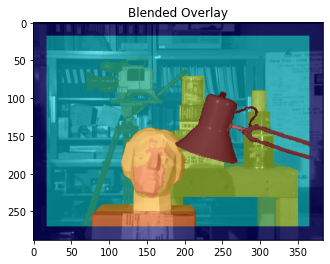

In [65]:
plt.imshow(overlay[..., ::-1])  # Convert BGR to RGB for displaying with matplotlib
plt.title("Blended Overlay")

Text(0.5, 1.0, 'Blended Overlay')

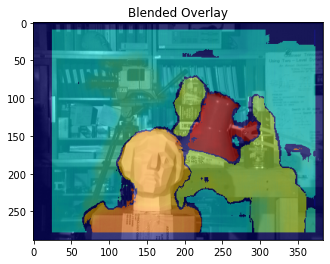

In [74]:
plt.imshow(overlay[..., ::-1])  # Convert BGR to RGB for displaying with matplotlib
plt.title("Blended Overlay")

Text(0.5, 1.0, 'Blended Overlay')

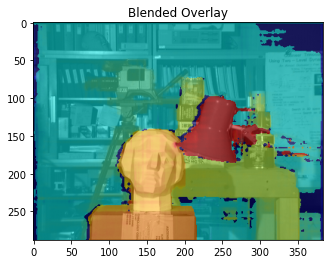

In [229]:
overlay = overlay_disparity_on_image(original_image, disparity_sgbm, alpha=0.5)
plt.imshow(overlay[..., ::-1])  # Convert BGR to RGB for displaying with matplotlib
plt.title("Blended Overlay")

In [45]:
import cv2
import numpy as np
from typing import Dict, Union, Tuple

def compare_disparity_maps(
    disp_map1: np.ndarray,
    disp_map2: np.ndarray,
    bad_pixel_threshold: int = 1
) -> Union[Tuple[Dict[str, float], np.ndarray], None]:
    """
    Compares two disparity maps and returns metrics and a visual similarity map.

    Args:
        disp_map1: The ground truth disparity map. Invalid pixels are assumed to be 0.
        disp_map2: The disparity map generated by an algorithm.
        bad_pixel_threshold: The absolute difference threshold.

    Returns:
        A tuple containing:
        - A dictionary with calculated metrics:
            - 'mse': Mean Squared Error over all valid GT pixels.
            - 'mae': Mean Absolute Error over all valid GT pixels.
            - 'bad_pixel_percentage': Percentage of pixels with error > threshold,
                                      out of all valid GT pixels. Lower is better.
            - 'correct_est_percentage': Percentage of pixels with error <= threshold,
                                        out of all pixels that are valid in BOTH maps.
                                        Higher is better.
        - A uint8 NumPy array (similarity map) for visualization.
        Returns None if inputs are invalid.
    """
    try:
        # --- Sanity Checks ---
        if not all(isinstance(arr, np.ndarray) for arr in [disp_map1, disp_map2]):
            print("Error: Inputs must be NumPy arrays.")
            return None
        if disp_map1.shape != disp_map2.shape:
            print(f"Error: Image dimensions do not match. {disp_map1.shape} vs {disp_map2.shape}")
            return None

        # --- Create Masks ---
        gt_valid_mask = disp_map1 > 0
        est_valid_mask = disp_map2 > 0
        
        # This mask finds where BOTH maps have valid disparities
        mutual_valid_mask = gt_valid_mask & est_valid_mask

        # --- Handle Edge Case: No Valid Ground Truth ---
        if not gt_valid_mask.any():
            print("Warning: The ground truth disparity map is entirely empty (all zeros).")
            error_metrics = {
                "mse": float('inf'),
                "mae": float('inf'),
                "bad_pixel_percentage": 100.0,
                "correct_est_percentage": 0.0
            }
            return error_metrics, np.zeros_like(disp_map1, dtype=np.uint8)

        # --- Calculate Standard Metrics (based on valid GT) ---
        valid_gt_pixels = disp_map1[gt_valid_mask].astype(np.float32)
        corresponding_est_pixels = disp_map2[gt_valid_mask].astype(np.float32)
        
        abs_diff_gt_valid = np.abs(valid_gt_pixels - corresponding_est_pixels)
        
        mse = np.mean(abs_diff_gt_valid ** 2)
        mae = np.mean(abs_diff_gt_valid)
        bad_pixels_count = np.sum(abs_diff_gt_valid > bad_pixel_threshold)
        bad_pixel_percentage = (bad_pixels_count / gt_valid_mask.sum()) * 100.0

        # --- Calculate New Metric (based on mutually valid pixels) ---
        if not mutual_valid_mask.any():
            correct_est_percentage = 0.0
        else:
            # Get pixel values only where both maps are valid
            mutual_gt = disp_map1[mutual_valid_mask].astype(np.float32)
            mutual_est = disp_map2[mutual_valid_mask].astype(np.float32)
            
            abs_diff_mutual = np.abs(mutual_gt - mutual_est)
            
            # Count pixels that are "correct" within this subset
            correct_pixels_count = np.sum(abs_diff_mutual <= bad_pixel_threshold)
            
            # Calculate percentage against the total number of mutually valid pixels
            correct_est_percentage = (correct_pixels_count / mutual_valid_mask.sum()) * 100.0

        # --- Compile Metrics ---
        metrics = {
            "mse": mse,
            "mae": mae,
            "bad_pixel_percentage": bad_pixel_percentage,
            "correct_est_percentage": correct_est_percentage
        }

        # --- Create the Similarity / Error Map ---
        similarity_map = np.zeros_like(disp_map1, dtype=np.uint8)
        abs_diff_full = np.abs(disp_map1.astype(np.float32) - disp_map2.astype(np.float32))
        good_pixels_mask = (abs_diff_full <= bad_pixel_threshold) & gt_valid_mask
        bad_pixels_mask = (abs_diff_full > bad_pixel_threshold) & gt_valid_mask
        similarity_map[good_pixels_mask] = 255  # White for good
        similarity_map[bad_pixels_mask] = 128   # Gray for bad
        
        return metrics, similarity_map

    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# --- Example Usage ---

# 1. Ground truth with invalid areas
ground_truth_map = np.full((16, 16), 100, dtype=np.uint8)
ground_truth_map[0:4, :] = 0  # Invalid GT area

# 2. Result map with its own invalid areas and some errors
result_map = ground_truth_map.copy()
# This area is valid in GT but invalid in our result.
# It will count against bad_pixel_percentage but be ignored by correct_est_percentage.
result_map[4:8, :] = 0 
# This is a large error in a mutually valid area
result_map[10:12, :] = 150 
# This is a small, "correct" error in a mutually valid area
result_map[12:14, :] = 101

print("--- Calculating standard and new correctness metrics ---")
comparison_result = compare_disparity_maps(ground_truth_map, result_map, bad_pixel_threshold=3)

if comparison_result:
    error_metrics, sim_map = comparison_result
    
    print(f"Mean Squared Error (MSE): {error_metrics['mse']:.2f}")
    print(f"Mean Absolute Error (MAE): {error_metrics['mae']:.2f}")
    print(f"Bad Pixel Percentage (Lower is Better): {error_metrics['bad_pixel_percentage']:.2f}%")
    print(f"Correctness on Valid Estimates (Higher is Better): {error_metrics['correct_est_percentage']:.2f}%")
    
    # cv2.imwrite("similarity_map_v2.png", sim_map)
    # print("\nSimilarity map saved to 'similarity_map_v2.png'")

--- Calculating standard and new correctness metrics ---
Mean Squared Error (MSE): 3750.17
Mean Absolute Error (MAE): 41.83
Bad Pixel Percentage (Lower is Better): 50.00%
Correctness on Valid Estimates (Higher is Better): 75.00%


Mean Squared Error (MSE): 6.39
Mean Absolute Error (MAE): 0.97
Bad Pixel Percentage (Lower is Better): 12.73%
Correctness on Valid Estimates (Higher is Better): 94.20%


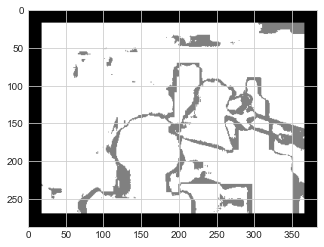

In [57]:
comparison_result = compare_disparity_maps(gt_disp/16.0, disparity_bm/16.0, bad_pixel_threshold=1)
if comparison_result:
    error_metrics, sim_map = comparison_result
    
    print(f"Mean Squared Error (MSE): {error_metrics['mse']:.2f}")
    print(f"Mean Absolute Error (MAE): {error_metrics['mae']:.2f}")
    print(f"Bad Pixel Percentage (Lower is Better): {error_metrics['bad_pixel_percentage']:.2f}%")
    print(f"Correctness on Valid Estimates (Higher is Better): {error_metrics['correct_est_percentage']:.2f}%")
    
    plt.imshow(sim_map, 'gray')

Mean Squared Error (MSE): 3.39
Mean Absolute Error (MAE): 0.62
Bad Pixel Percentage (Lower is Better): 7.64%
Correctness on Valid Estimates (Higher is Better): 95.55%


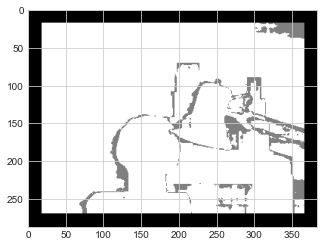

In [62]:
comparison_result = compare_disparity_maps(gt_disp/16.0, np.array(disparity_sgbm/16.0).astype("int32"), bad_pixel_threshold=1)
if comparison_result:
    error_metrics, sim_map = comparison_result
    
    print(f"Mean Squared Error (MSE): {error_metrics['mse']:.2f}")
    print(f"Mean Absolute Error (MAE): {error_metrics['mae']:.2f}")
    print(f"Bad Pixel Percentage (Lower is Better): {error_metrics['bad_pixel_percentage']:.2f}%")
    print(f"Correctness on Valid Estimates (Higher is Better): {error_metrics['correct_est_percentage']:.2f}%")
    
    plt.imshow(sim_map, 'gray')

Mean Squared Error (MSE): 3.32
Mean Absolute Error (MAE): 0.58
Bad Pixel Percentage (Lower is Better): 8.77%
Correctness on Valid Estimates (Higher is Better): 94.39%


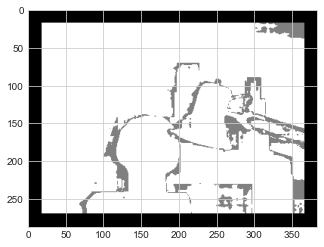

In [58]:
comparison_result = compare_disparity_maps(gt_disp/16.0, disparity_sgbm/16.0, bad_pixel_threshold=1)
if comparison_result:
    error_metrics, sim_map = comparison_result
    
    print(f"Mean Squared Error (MSE): {error_metrics['mse']:.2f}")
    print(f"Mean Absolute Error (MAE): {error_metrics['mae']:.2f}")
    print(f"Bad Pixel Percentage (Lower is Better): {error_metrics['bad_pixel_percentage']:.2f}%")
    print(f"Correctness on Valid Estimates (Higher is Better): {error_metrics['correct_est_percentage']:.2f}%")
    
    plt.imshow(sim_map, 'gray')

--- Visualizing a near-perfect parabolic cost function ---


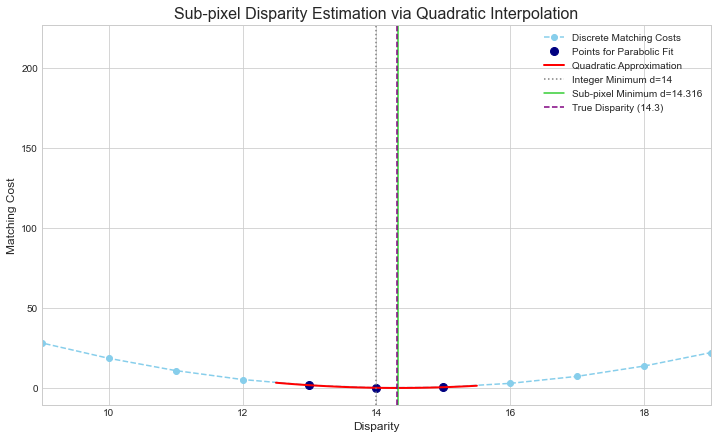


--- Visualizing a more realistic (e.g., SAD-like) cost function ---


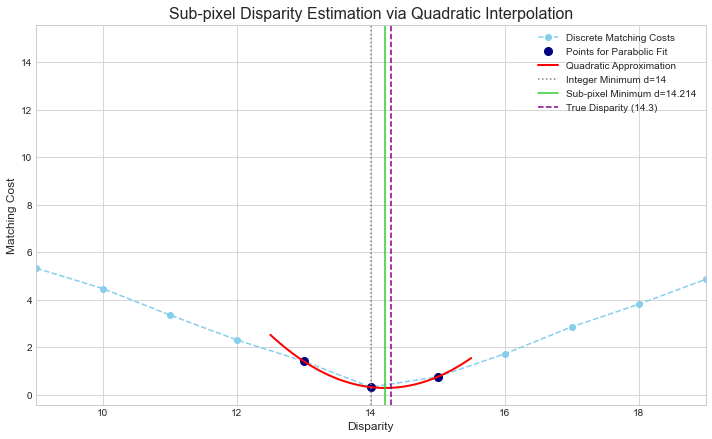

In [51]:
import numpy as np
import matplotlib.pyplot as plt

def plot_subpixel_approximation(costs: np.ndarray, true_disp: float = None):
    """
    Visualizes the cost curve and its quadratic sub-pixel approximation.

    This function takes a 1D cost array for a single pixel, finds the integer
    minimum, calculates the sub-pixel refinement, and plots both the original
    costs and the fitted parabola.

    Args:
        costs (np.ndarray): A 1D numpy array of matching costs, where the index
                            represents the integer disparity.
        true_disp (float, optional): If provided, the true disparity will be
                                     plotted as a vertical line for reference.
    """
    if costs.ndim != 1:
        raise ValueError("Input 'costs' must be a 1D array.")

    max_disp = len(costs)
    disparities = np.arange(max_disp)

    # --- 1. Find the integer disparity with the minimum cost ---
    d_int = np.argmin(costs)
    cost_min = costs[d_int]

    # --- 2. Get the costs for the integer disparity and its neighbors ---
    # Handle boundary cases where the minimum is at d=0 or d=max_disp-1
    if d_int == 0 or d_int == max_disp - 1:
        print("Minimum cost is at the boundary. Sub-pixel approximation is not performed.")
        d_subpixel = float(d_int)
        
        # Create a simple plot without the parabola
        plt.figure(figsize=(10, 6))
        plt.plot(disparities, costs, 'o-', label='Matching Cost', color='gray')
        plt.plot(d_int, cost_min, 'ro', markersize=10, label=f'Integer Minimum ({d_int})')
        plt.title('Cost Function (Boundary Minimum)')
        plt.xlabel('Disparity')
        plt.ylabel('Cost')
        plt.legend()
        # plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()
        plt.grid(False)
        return

    cost_d_minus_1 = costs[d_int - 1]
    cost_d = costs[d_int]
    cost_d_plus_1 = costs[d_int + 1]

    # --- 3. Calculate the sub-pixel offset (delta) ---
    # This formula finds the vertex of the parabola fitted to the three points
    numerator = cost_d_minus_1 - cost_d_plus_1
    denominator = cost_d_minus_1 + cost_d_plus_1 - 2 * cost_d
    
    # Avoid division by zero, though unlikely if d_int is a true minimum
    delta = 0.5 * numerator / denominator if denominator != 0 else 0.0
    
    d_subpixel = d_int + delta
    
    # --- 4. Define the parabola for plotting ---
    # We define the parabola y = a(x-d_int)^2 + b(x-d_int) + c
    # and find the coefficients a, b, c.
    c = cost_d
    a = 0.5 * (cost_d_minus_1 + cost_d_plus_1 - 2 * cost_d)
    b = 0.5 * (cost_d_plus_1 - cost_d_minus_1)
    
    # Generate points for the smooth parabola curve
    fine_grained_disparities = np.linspace(d_int - 1.5, d_int + 1.5, 100)
    parabola_x = fine_grained_disparities
    parabola_y = a * (parabola_x - d_int)**2 + b * (parabola_x - d_int) + c
    
    # --- 5. Plotting ---
    # plt.style.use('seaborn-whitegrid')
    plt.figure(figsize=(12, 7))

    # Plot the original cost function
    plt.plot(disparities, costs, 'o--', color='skyblue', label='Discrete Matching Costs')

    # Highlight the three points used for interpolation
    plt.plot([d_int - 1, d_int, d_int + 1], [cost_d_minus_1, cost_d, cost_d_plus_1],
             'o', color='navy', markersize=8, label='Points for Parabolic Fit')

    # Plot the fitted parabola
    plt.plot(parabola_x, parabola_y, '-', color='red', linewidth=2, label='Quadratic Approximation')

    # Mark the integer and sub-pixel minimums
    plt.axvline(x=d_int, color='gray', linestyle=':', label=f'Integer Minimum d={d_int}')
    plt.axvline(x=d_subpixel, color='limegreen', linestyle='-', 
                label=f'Sub-pixel Minimum d={d_subpixel:.3f}')

    # Plot the true disparity if provided
    if true_disp is not None:
        plt.axvline(x=true_disp, color='purple', linestyle='--', label=f'True Disparity ({true_disp})')

    plt.title('Sub-pixel Disparity Estimation via Quadratic Interpolation', fontsize=16)
    plt.xlabel('Disparity', fontsize=12)
    plt.ylabel('Matching Cost', fontsize=12)
    plt.legend(fontsize=10)
    plt.xlim(max(0, d_int - 5), min(max_disp, d_int + 5)) # Zoom in around the minimum
    plt.show()


# --- Example Usage ---
if __name__ == '__main__':
    # Create synthetic cost data where we know the true minimum
    true_disparity = 14.3
    disparity_range = np.arange(30)
    
    # A perfect parabolic cost function
    # C(d) = (d - true_disp)^2 + noise
    noise = np.random.rand(len(disparity_range)) * 0.1
    perfect_costs = (disparity_range - true_disparity)**2 + noise
    
    print("--- Visualizing a near-perfect parabolic cost function ---")
    plot_subpixel_approximation(perfect_costs, true_disp=true_disparity)

    # A more realistic, non-parabolic cost function (e.g., from a truncated linear function)
    # This simulates a cost function like Sum of Absolute Differences (SAD)
    realistic_costs = np.abs(disparity_range - true_disparity)
    realistic_costs += np.random.rand(len(disparity_range)) * 0.2 # Add some noise
    
    print("\n--- Visualizing a more realistic (e.g., SAD-like) cost function ---")
    plot_subpixel_approximation(realistic_costs, true_disp=true_disparity)


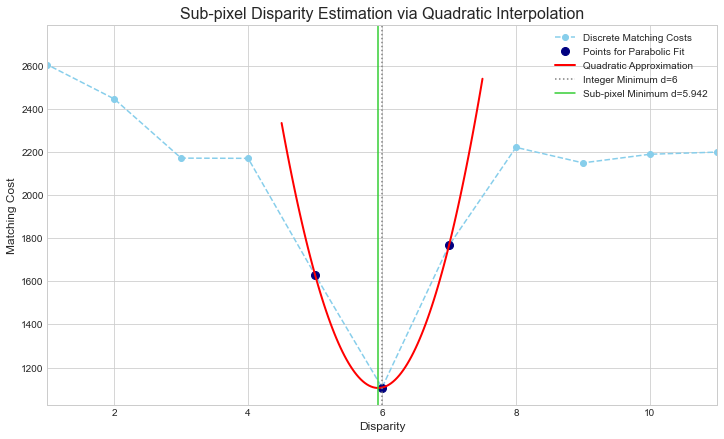

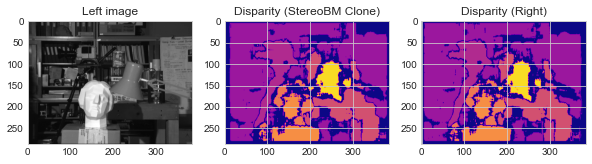

In [114]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

class StereoBMClone:
    def __init__(self, num_disparities=16, block_size=9, uniqueness_ratio=15, pre_filter_cap=31, debug_subpixel=False, dbg_subpix_idx=(0,0)):
        self.num_disparities = num_disparities
        self.block_size = block_size
        self.uniqueness_ratio = uniqueness_ratio
        self.pre_filter_cap = pre_filter_cap
        self.debug_subpixel = debug_subpixel
        self.dbg_subpix_idx = dbg_subpix_idx

    def prefilter(self, img):
        """Prefilter normalization (similar to OpenCV StereoBM)"""
        # Apply Sobel to enhance texture
        sobel = cv2.Sobel(img, cv2.CV_16S, 1, 0, ksize=3)
        sobel = np.clip(sobel, -self.pre_filter_cap, self.pre_filter_cap)
        # Normalize to 0-255
        sobel = cv2.convertScaleAbs(sobel)
        return sobel
        # Pre-filtering: histogram equalization and slight blur
        # img = cv2.equalizeHist(img)
        # img = cv2.GaussianBlur(img, (5, 5), 0)
        # return img

    def get_subpixel_disparity(self, costs, d_int):
        """Compute sub-pixel disparity using quadratic interpolation"""
        if d_int <= 0 or d_int >= len(costs) - 1:
            return float(d_int)  # No sub-pixel refinement at boundaries

        c_minus = costs[d_int - 1]
        c = costs[d_int]
        c_plus = costs[d_int + 1]

        numerator = c_minus - c_plus
        denominator = c_minus + c_plus - 2 * c
        if denominator == 0:
            return float(d_int)

        delta = 0.5 * numerator / denominator
        return d_int + delta

    def compute(self, left, right):
        """Compute disparity map using SAD block matching"""
        left = self.prefilter(left)
        right = self.prefilter(right)

        h, w = left.shape
        disp_map = np.full((h, w), 0, dtype=np.int32)
        subpix_disp_map = np.full((h, w), 0.0, dtype=np.float32)

        half = self.block_size // 2
        cost_search_list = []
        for y in range(half, h - half):
            for x in range(half, w - half):
                cost_search_list.clear()
                left_patch = left[y-half:y+half+1, x-half:x+half+1].astype(np.int32)

                best_cost = np.inf
                second_best = np.inf
                best_d = -1

                for d in range(self.num_disparities):
                    xr = x - d
                    if xr - half < 0:
                        continue
                    right_patch = right[y-half:y+half+1, xr-half:xr+half+1].astype(np.int32)

                    # SAD cost
                    cost = np.sum(np.abs(left_patch - right_patch))
                    cost_search_list.append(cost)
                    if cost < best_cost:
                        second_best = best_cost
                        best_cost = cost
                        best_d = d
                    elif cost < second_best:
                        second_best = cost

                # Uniqueness ratio check (like OpenCV)
                if best_d >= 0 and second_best < np.inf:
                    if best_cost <= (1 - self.uniqueness_ratio/100.0) * second_best:
                        disp_map[y, x] = best_d
                        subpix_disp_map[y, x] = self.get_subpixel_disparity(cost_search_list, best_d)

                if self.debug_subpixel and y == self.dbg_subpix_idx[1] and x == self.dbg_subpix_idx[0]:
                    costs_row = np.array(cost_search_list)
                    plot_subpixel_approximation(costs_row)

        return disp_map, subpix_disp_map
    
    def compute_right(self, left, right):
        """Compute disparity map using SAD block matching"""
        left = self.prefilter(left)
        right = self.prefilter(right)

        h, w = left.shape
        disp_map = np.full((h, w), 0, dtype=np.int32)

        half = self.block_size // 2
        for y in range(half, h - half):
            for x in range(half, w - half):
                right_patch = right[y-half:y+half+1, x-half:x+half+1].astype(np.int32)

                best_cost = np.inf
                second_best = np.inf
                best_d = -1

                for d in range(self.num_disparities):
                    xl = x + d
                    if xl + half >= w:
                        continue
                    left_patch = left[y-half:y+half+1, xl-half:xl+half+1].astype(np.int32)

                    # SAD cost
                    cost = np.sum(np.abs(right_patch - left_patch))

                    if cost < best_cost:
                        second_best = best_cost
                        best_cost = cost
                        best_d = d
                    elif cost < second_best:
                        second_best = cost

                # Uniqueness ratio check (like OpenCV)
                if best_d >= 0 and second_best < np.inf:
                    if best_cost <= (1 - self.uniqueness_ratio/100.0) * second_best:
                        disp_map[y, x] = best_d

        return disp_map

if __name__ == "__main__":
    # Example: synthetic stereo
    left = cv2.imread(r"C:\Users\Angel\computer-vision\3D\Disparity\imgs\tsukuba_l.png", cv2.IMREAD_GRAYSCALE)
    right = cv2.imread(r"C:\Users\Angel\computer-vision\3D\Disparity\imgs\tsukuba_r.png", cv2.IMREAD_GRAYSCALE)



    stereo = StereoBMClone(num_disparities=16, block_size=15, uniqueness_ratio=15, debug_subpixel=True, dbg_subpix_idx=(150, 100))
    disp_l, sub_disp_l = stereo.compute(left, right)
    disp_r = stereo.compute_right(left, right)

    plt.figure(figsize=(10,4))
    plt.subplot(1,3,1)
    plt.grid(False) 
    plt.title("Left image")
    plt.imshow(left, cmap="gray")
    plt.subplot(1,3,2)
    plt.title("Disparity (StereoBM Clone)")
    plt.imshow(disp_l, cmap="plasma")
    plt.subplot(1,3,3)
    plt.title("Disparity (Right)")
    plt.imshow(disp_r, cmap="plasma")
    plt.show()


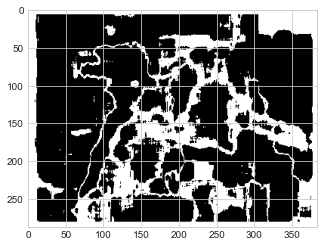

In [116]:
mask = (disp_l == 0)
plt.imshow(mask,'gray')

Text(0.5, 1.0, 'Blended Overlay')

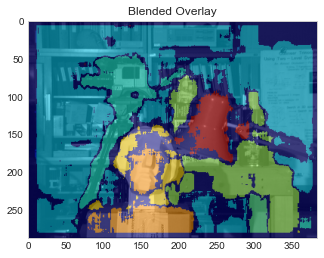

In [54]:
overlay = overlay_disparity_on_image(original_image, disp_l, alpha=0.5)
plt.grid(False) 
plt.imshow(overlay[..., ::-1])  # Convert BGR to RGB for displaying with matplotlib
plt.title("Blended Overlay")

Mean Squared Error (MSE): 16.02
Mean Absolute Error (MAE): 1.95
Bad Pixel Percentage (Lower is Better): 27.31%
Correctness on Valid Estimates (Higher is Better): 97.05%


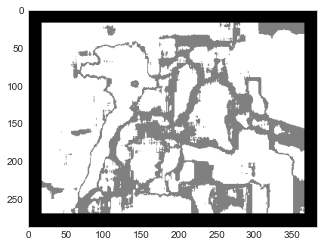

In [55]:

comparison_result = compare_disparity_maps(gt_disp/16.0, disp_l, bad_pixel_threshold=1)
if comparison_result:
    error_metrics, sim_map = comparison_result
    
    print(f"Mean Squared Error (MSE): {error_metrics['mse']:.2f}")
    print(f"Mean Absolute Error (MAE): {error_metrics['mae']:.2f}")
    print(f"Bad Pixel Percentage (Lower is Better): {error_metrics['bad_pixel_percentage']:.2f}%")
    print(f"Correctness on Valid Estimates (Higher is Better): {error_metrics['correct_est_percentage']:.2f}%")
    plt.grid(False)
    plt.imshow(sim_map, 'gray')

Mean Squared Error (MSE): 16.02
Mean Absolute Error (MAE): 2.00
Bad Pixel Percentage (Lower is Better): 27.77%
Correctness on Valid Estimates (Higher is Better): 96.43%


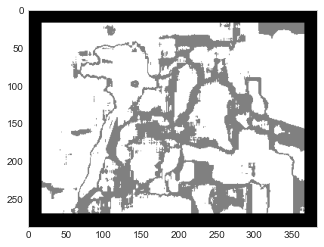

In [56]:
comparison_result = compare_disparity_maps(gt_disp/16.0, sub_disp_l, bad_pixel_threshold=1)
if comparison_result:
    error_metrics, sim_map = comparison_result
    
    print(f"Mean Squared Error (MSE): {error_metrics['mse']:.2f}")
    print(f"Mean Absolute Error (MAE): {error_metrics['mae']:.2f}")
    print(f"Bad Pixel Percentage (Lower is Better): {error_metrics['bad_pixel_percentage']:.2f}%")
    print(f"Correctness on Valid Estimates (Higher is Better): {error_metrics['correct_est_percentage']:.2f}%")
    plt.grid(False)
    plt.imshow(sim_map, 'gray')

In [ ]:
# Tomatoe Example: synthetic stereo
left = cv2.imread(r"F:\tomato_disp_data\1757292281913_left.png", cv2.IMREAD_GRAYSCALE)
right = cv2.imread(r"F:\tomato_disp_data\1757292281913_right.png", cv2.IMREAD_GRAYSCALE)

stereo = StereoBMClone(num_disparities=96, block_size=15, uniqueness_ratio=15)
disp = stereo.compute(left, right)
disp_r = stereo.compute_right(left, right)

plt.figure(figsize=(20,8))
plt.subplot(1,4,1)
plt.title("Left image")
plt.imshow(left, cmap="gray")
plt.subplot(1,4,2)
plt.title("Right image")
plt.imshow(right, cmap="gray")
plt.subplot(1,4,3)
plt.title("Disparity (StereoBM Clone)")
plt.imshow(disp, cmap="plasma")
plt.subplot(1,4,4)
plt.title("Disparity (Right)")
plt.imshow(disp_r, cmap="plasma")
plt.show()

Text(0.5, 1.0, 'Pixels where disp == -1')

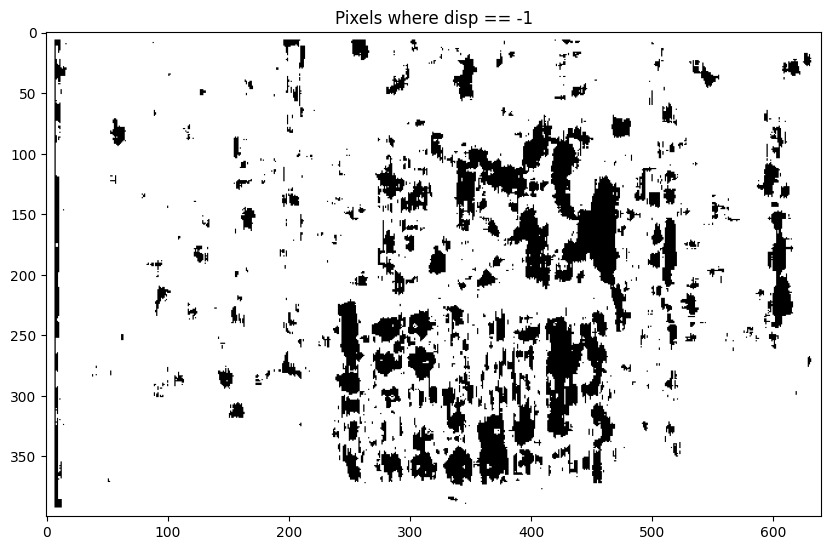

In [11]:
import numpy as np

# Show locations where disp == -1
mask = (disp == -1)
# print("Indices where disp == -1:", np.argwhere(mask))

# Or visualize as an image (white = -1, black = other)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(mask, cmap='gray')
plt.title("Pixels where disp == -1")


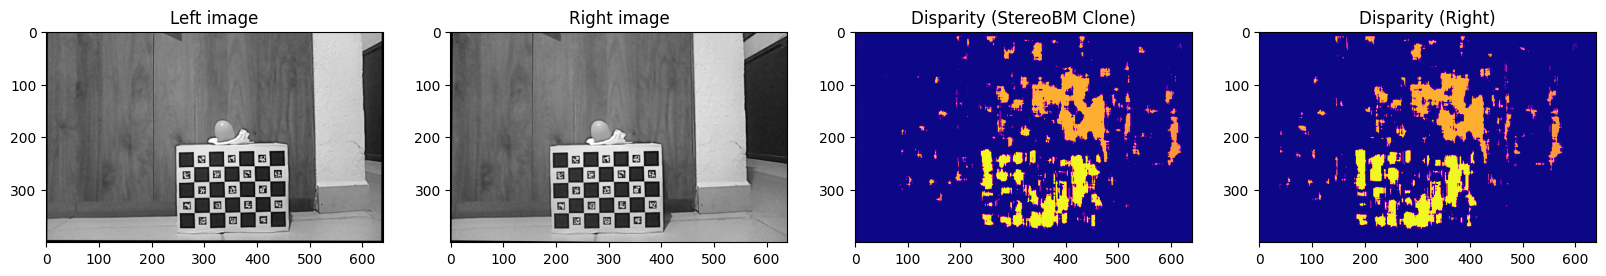

In [23]:
# Tomatoe Example: synthetic stereo
left = cv2.imread(r"F:\tomato_disp_data\1757292281913_left.png", cv2.IMREAD_GRAYSCALE)
right = cv2.imread(r"F:\tomato_disp_data\1757292281913_right.png", cv2.IMREAD_GRAYSCALE)

stereo = StereoBMClone(num_disparities=96, block_size=20, uniqueness_ratio=15)
disp = stereo.compute(left, right)
disp_r = stereo.compute_right(left, right)

plt.figure(figsize=(20,8))
plt.subplot(1,4,1)
plt.title("Left image")
plt.imshow(left, cmap="gray")
plt.subplot(1,4,2)
plt.title("Right image")
plt.imshow(right, cmap="gray")
plt.subplot(1,4,3)
plt.title("Disparity (StereoBM Clone)")
plt.imshow(disp, cmap="plasma")
plt.subplot(1,4,4)
plt.title("Disparity (Right)")
plt.imshow(disp_r, cmap="plasma")
plt.show()

Text(0.5, 1.0, 'Pixels where disp == -1')

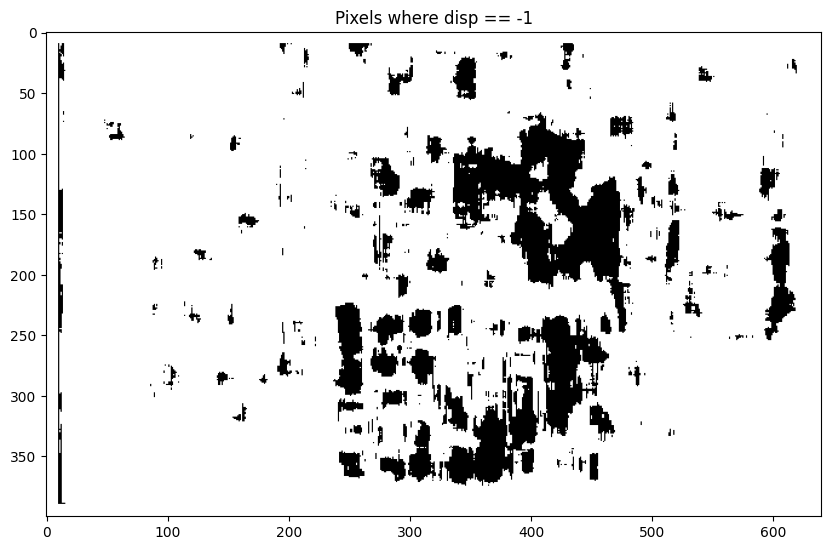

In [26]:
import numpy as np

# Show locations where disp == -1
mask = (disp == -1)
# print("Indices where disp == -1:", np.argwhere(mask))

# Or visualize as an image (white = -1, black = other)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(mask, cmap='gray')
plt.title("Pixels where disp == -1")


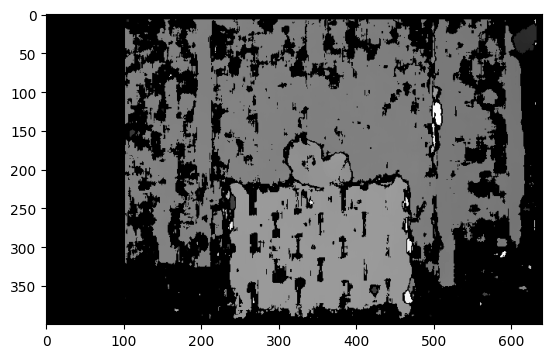

In [17]:
stereo = cv2.StereoBM.create(numDisparities=96, blockSize=15)
cv_disparity = stereo.compute(left,right)
plt.imshow(cv_disparity,'gray')
plt.show()

In [18]:
np.min(cv_disparity)

-16

Text(0.5, 1.0, 'Pixels where disp == -1')

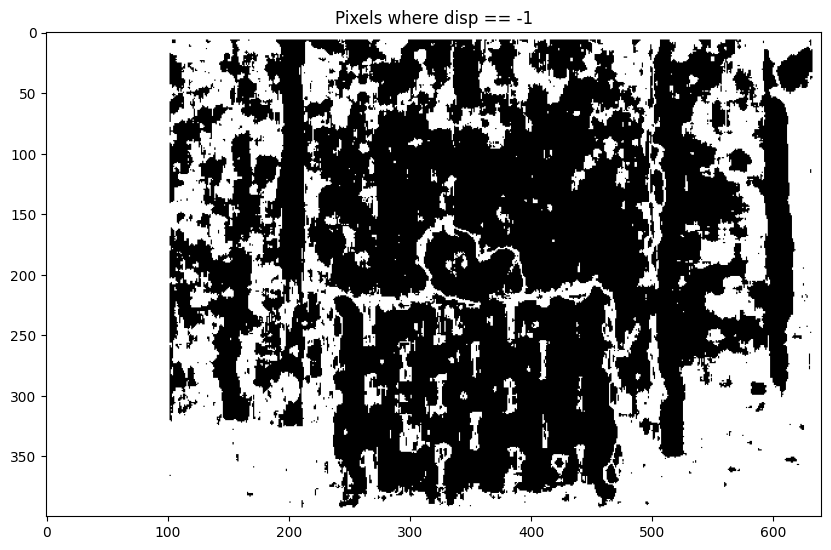

In [19]:
# Show locations where disp == -1
mask = (cv_disparity <= -1)
# print("Indices where disp == -1:", np.argwhere(mask))

# Or visualize as an image (white = -1, black = other)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(mask, cmap='gray')
plt.title("Pixels where disp == -1")

Text(0.5, 1.0, 'Luxonis Disparity Map')

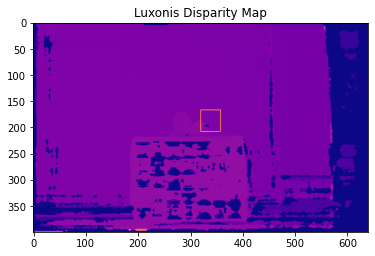

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load disparity map from file (replace with your path)
disp_gt = np.load(r"F:\tomato_disp_data\1757292281913_disp.npy")  # e.g. "disparity.npy"

plt.imshow(disp_gt, cmap='plasma')
# plt.colorbar(label='Disparity')
plt.title("Luxonis Disparity Map")

Text(0.5, 1.0, 'Pixels where disp == -1')

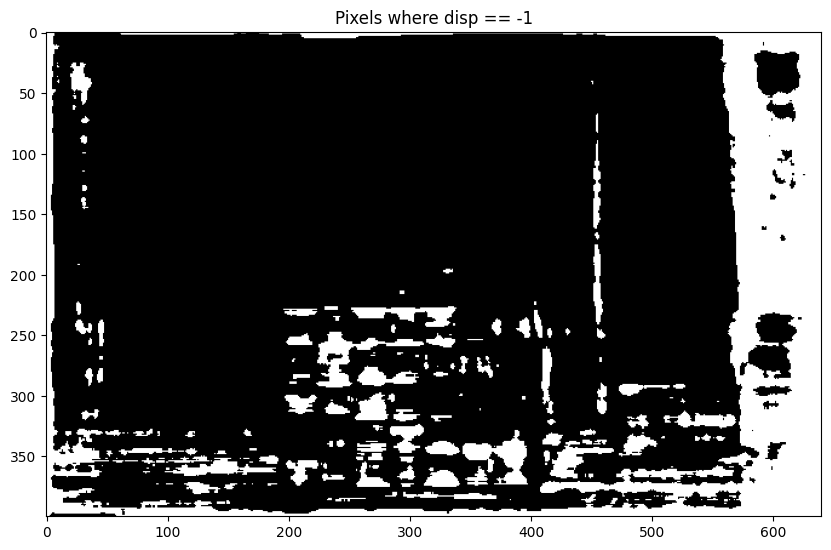

In [22]:
# Show locations where disp == -1
mask = (disp_gt <= 0)
# print("Indices where disp == -1:", np.argwhere(mask))

# Or visualize as an image (white = -1, black = other)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(mask, cmap='gray')
plt.title("Pixels where disp == -1")

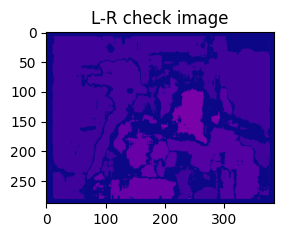

In [153]:
def left_right_consistency_check(dispL, dispR, tol=1):
    """
    Invalidate disparities that are not consistent between L/R views.
    Args:
        dispL (np.ndarray): Left disparity map.
        dispR (np.ndarray): Right disparity map.
        tol (float): Allowed difference between disparities.
    Returns:
        np.ndarray: Filtered disparity map (invalid pixels set to -1).
    """
    h, w = dispL.shape
    out = np.full_like(dispL, -1, dtype=np.float32)
    for y in range(h):
        for x in range(w):
            dL = dispL[y, x]
            if dL < 0:
                continue
            xr = int(round(x - dL))
            if xr < 0 or xr >= w:
                continue
            dR = dispR[y, xr]
            if dR >= 0 and abs(dL - dR) <= tol:
                out[y, x] = dL
    return out

disp_filtered = left_right_consistency_check(disp, disp_r, tol=1)

plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
plt.title("L-R check image")
plt.imshow(disp_filtered, cmap="plasma")
plt.show()

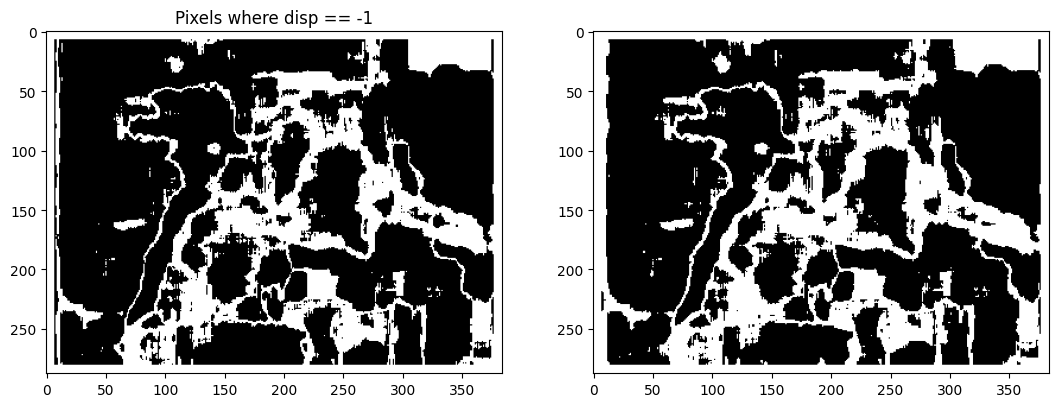

In [158]:
import numpy as np

# Show locations where disp == -1
mask = (disp == -1)
mask_l_r = (disp_filtered == -1)
# print("Indices where disp == -1:", np.argwhere(mask))

# Or visualize as an image (white = -1, black = other)
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(mask, cmap='gray')
plt.title("Pixels where disp == -1")
plt.subplot(1,3,2)
plt.imshow(mask_l_r, cmap='gray')
plt.show()

In [134]:
np.min(disp), np.max(disp)

(-1.0, 25.0)

In [136]:
np.min(disp), np.max(disp)

(-1.0, 94.0)

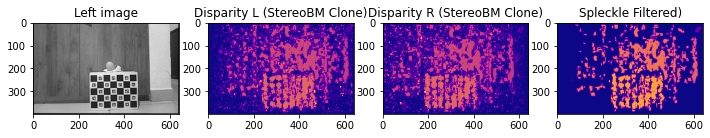

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from collections import deque

class StereoBMClone:
    def __init__(self, num_disparities=16, block_size=9,
                 uniqueness_ratio=15, pre_filter_cap=31,
                 speckle_window_size=50, speckle_range=1):
        self.num_disparities = num_disparities
        self.block_size = block_size
        self.uniqueness_ratio = uniqueness_ratio
        self.pre_filter_cap = pre_filter_cap
        self.speckle_window_size = speckle_window_size
        self.speckle_range = speckle_range

    def prefilter(self, img):
        """Prefilter normalization (similar to OpenCV StereoBM)"""
        sobel = cv2.Sobel(img, cv2.CV_16S, 1, 0, ksize=3)
        sobel = np.clip(sobel, -self.pre_filter_cap, self.pre_filter_cap)
        sobel = cv2.convertScaleAbs(sobel)  # back to 8-bit
        return sobel

    def block_match(self, left, right):
        """Compute disparity map using SAD block matching with uniqueness ratio"""
        h, w = left.shape
        disp_map = np.full((h, w), -1, dtype=np.float32)
        half = self.block_size // 2

        for y in range(half, h-half):
            for x in range(half, w-half):
                left_patch = left[y-half:y+half+1, x-half:x+half+1].astype(np.int32)

                best_cost = np.inf
                second_best = np.inf
                best_d = -1

                for d in range(self.num_disparities):
                    xr = x - d
                    if xr - half < 0:
                        continue
                    right_patch = right[y-half:y+half+1, xr-half:xr+half+1].astype(np.int32)
                    cost = np.sum(np.abs(left_patch - right_patch))

                    if cost < best_cost:
                        second_best = best_cost
                        best_cost = cost
                        best_d = d
                    elif cost < second_best:
                        second_best = cost

                # Uniqueness ratio check
                if best_d >= 0 and second_best < np.inf:
                    if best_cost <= (1 - self.uniqueness_ratio/100.0) * second_best:
                        disp_map[y, x] = best_d
                elif best_d >= 0:
                    disp_map[y, x] = best_d

        return disp_map
    
    def block_match_right(self, left, right):
        """Compute disparity map using SAD block matching with uniqueness ratio"""
        h, w = left.shape
        disp_map = np.full((h, w), -1, dtype=np.float32)
        half = self.block_size // 2

        for y in range(half, h-half):
            for x in range(half, w-half):
                right_patch = right[y-half:y+half+1, x-half:x+half+1].astype(np.int32)

                best_cost = np.inf
                second_best = np.inf
                best_d = -1

                for d in range(self.num_disparities):
                    xl = x + d
                    if xl + half >= w:
                        continue
                    left_patch = left[y-half:y+half+1, xl-half:xl+half+1].astype(np.int32)
                    cost = np.sum(np.abs(right_patch - left_patch))

                    if cost < best_cost:
                        second_best = best_cost
                        best_cost = cost
                        best_d = d
                    elif cost < second_best:
                        second_best = cost

                # Uniqueness ratio check
                if best_d >= 0 and second_best < np.inf:
                    if best_cost <= (1 - self.uniqueness_ratio/100.0) * second_best:
                        disp_map[y, x] = best_d
                elif best_d >= 0:
                    disp_map[y, x] = best_d

        return disp_map

    def left_right_consistency(self, dL, dR, tol=1):
        """Invalidate disparities that are not consistent between L/R views"""
        h, w = dL.shape
        mask = np.ones_like(dL, dtype=bool)
        for y in range(h):
            for x in range(w):
                d = dL[y, x]
                if d < 0:
                    mask[y, x] = False
                    continue
                xr = int(round(x - d))
                if xr < 0 or xr >= w:
                    mask[y, x] = False
                    continue
                d_r = dR[y, xr]
                if d_r < 0 or abs(d - d_r) > tol:
                    mask[y, x] = False
        out = np.where(mask, dL, -1)
        return out

    def speckle_filter(self, disp):
        """Remove small connected components (like OpenCV's speckle filtering)"""
        h, w = disp.shape
        visited = np.zeros((h, w), dtype=bool)
        output = disp.copy()

        def bfs(sy, sx):
            q = deque()
            q.append((sy, sx))
            pixels = [(sy, sx)]
            visited[sy, sx] = True
            d0 = disp[sy, sx]

            while q:
                y, x = q.popleft()
                for dy, dx in [(-1,0),(1,0),(0,-1),(0,1)]:
                    ny, nx = y+dy, x+dx
                    if 0 <= ny < h and 0 <= nx < w:
                        if not visited[ny, nx] and disp[ny, nx] >= 0:
                            if abs(disp[ny, nx] - d0) <= self.speckle_range:
                                visited[ny, nx] = True
                                q.append((ny, nx))
                                pixels.append((ny, nx))
            return pixels

        for y in range(h):
            for x in range(w):
                if disp[y, x] >= 0 and not visited[y, x]:
                    comp = bfs(y, x)
                    if len(comp) < self.speckle_window_size:
                        for (cy, cx) in comp:
                            output[cy, cx] = -2
        mask = (output == -2).astype(np.uint8)
        # Inpaint using neighboring disparities
        disp_filled = cv2.inpaint(np.float32(output), mask, inpaintRadius=1, flags=cv2.INPAINT_NS)
        return disp_filled

    def compute(self, left, right):
        """Full stereo matching pipeline"""
        left_f = self.prefilter(left)
        right_f = self.prefilter(right)

        dispL = self.block_match(left_f, right_f)
        dispR = self.block_match_right(left_f, right_f)

        # Left-right consistency check
        dispLR = self.left_right_consistency(dispL, dispR, tol=2)

        # Speckle filtering
        dispL_speckle = self.speckle_filter(dispLR)

        return dispL, dispR, dispL_speckle


if __name__ == "__main__":
    # Example: load stereo pair
    # left = cv2.imread(r"C:\Users\Angel\computer-vision\3D\Disparity\imgs\tsukuba_l.png", cv2.IMREAD_GRAYSCALE)
    # right = cv2.imread(r"C:\Users\Angel\computer-vision\3D\Disparity\imgs\tsukuba_r.png", cv2.IMREAD_GRAYSCALE)
    left = cv2.imread(r"F:\tomato_disp_data\1757292281913_left.png", cv2.IMREAD_GRAYSCALE)
    right = cv2.imread(r"F:\tomato_disp_data\1757292281913_right.png", cv2.IMREAD_GRAYSCALE)

    stereo = StereoBMClone(num_disparities=96, block_size=15,
                           uniqueness_ratio=5, pre_filter_cap=31,
                           speckle_window_size=35, speckle_range=3)

    dispL, dispR, disp_spleckle = stereo.compute(left, right)

    plt.figure(figsize=(12,4))
    plt.subplot(1,4,1)
    plt.title("Left image")
    plt.imshow(left, cmap="gray")
    plt.subplot(1,4,2)
    plt.title("Disparity L (StereoBM Clone)")
    plt.imshow(dispL, cmap="plasma")
    plt.subplot(1,4,3)
    plt.title("Disparity R (StereoBM Clone)")
    plt.imshow(dispR, cmap="plasma")
    plt.subplot(1,4,4)
    plt.title("Spleckle Filtered)")
    plt.imshow(disp_spleckle, cmap="plasma")
    plt.show()


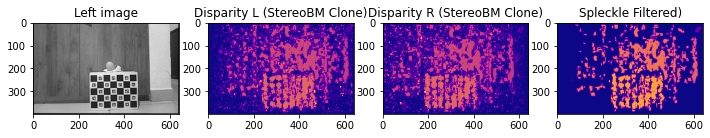

In [7]:
plt.figure(figsize=(12,4))
plt.subplot(1,4,1)
plt.title("Left image")
plt.imshow(left, cmap="gray")
plt.subplot(1,4,2)
plt.title("Disparity L (StereoBM Clone)")
plt.imshow(dispL, cmap="plasma")
plt.subplot(1,4,3)
plt.title("Disparity R (StereoBM Clone)")
plt.imshow(dispR, cmap="plasma")
plt.subplot(1,4,4)
plt.title("Spleckle Filtered)")
plt.imshow(disp_spleckle, cmap="plasma")
plt.show()

In [40]:
import cv2

gray_img = left
bgr_img = cv2.cvtColor(gray_img, cv2.COLOR_GRAY2BGR)

# Draw a red bounding box (x1, y1, x2, y2)
x1, y1, x2, y2 = 320, 167, 358, 208
cv2.rectangle(bgr_img, (x1, y1), (x2, y2), (0, 0, 255), 2)

cv2.imshow("BBox", bgr_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

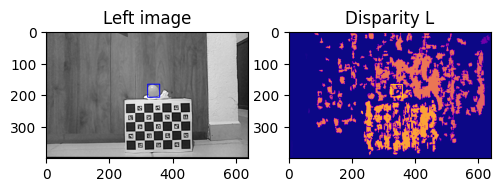

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Example bbox coordinates
x1, y1, x2, y2 = 320, 167, 358, 208

# Copy dispL to avoid modifying original
dispL_bbox = disp_spleckle.copy()

# Draw bbox (set border pixels to max value)
thickness = 3  # Change to desired line width
v = np.nanmax(dispL_bbox)

for t in range(thickness):
    dispL_bbox[y1+t:y2-t, x1+t] = v
    dispL_bbox[y1+t:y2-t, x2-t] = v
    dispL_bbox[y1+t, x1+t:x2-t] = v
    dispL_bbox[y2-t, x1+t:x2-t] = v


plt.figure(figsize=(12,4))
plt.subplot(1,4,1)
plt.title("Left image")
plt.imshow(bgr_img)
plt.subplot(1,4,2)
plt.title("Disparity L")
plt.imshow(dispL_bbox, cmap="plasma")
plt.show()


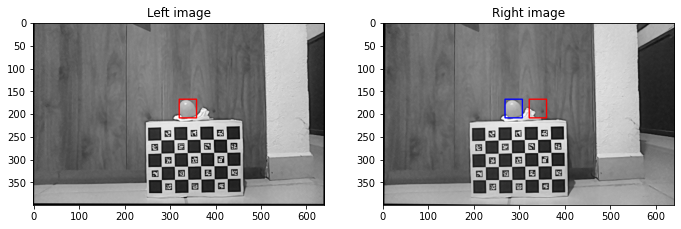

In [96]:
import cv2

left = cv2.imread(r"F:\tomato_disp_data\1757292281913_left.png", cv2.IMREAD_GRAYSCALE)
right = cv2.imread(r"F:\tomato_disp_data\1757292281913_right.png", cv2.IMREAD_GRAYSCALE)
left_bgr_img = cv2.cvtColor(left, cv2.COLOR_GRAY2BGR)
right_bgr_img = cv2.cvtColor(right, cv2.COLOR_GRAY2BGR)

# Draw a red bounding box (x1, y1, x2, y2)
l_x1, l_y1, l_x2, l_y2 = 320, 167, 358, 208
cv2.rectangle(left_bgr_img, (l_x1, l_y1), (l_x2, l_y2), (255, 0, 0), 2)
left_patch = left[l_y1:l_y2, l_x1:l_x2]

r_x1, r_y1, r_x2, r_y2 = 320-53, 167, 358-53, 208
cv2.rectangle(right_bgr_img, (r_x1, r_y1), (r_x2, r_y2), (0, 0, 255), 2)
l_x1, l_y1, l_x2, l_y2 = 320, 167, 358, 208
cv2.rectangle(right_bgr_img, (l_x1, l_y1), (l_x2, l_y2), (255, 0, 0), 2)
right_patch = right[r_y1:r_y2, r_x1:r_x2]

plt.figure(figsize=(24,8))
plt.subplot(1,4,1)
plt.title("Left image")
plt.imshow(left_bgr_img)
plt.subplot(1,4,2)
plt.title("Right image")
plt.imshow(right_bgr_img)
plt.show()

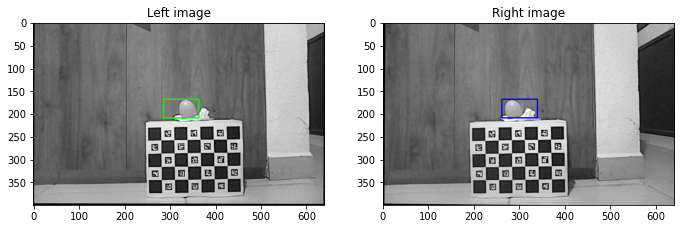

In [100]:
import cv2

left = cv2.imread(r"F:\tomato_disp_data\1757292281913_left.png", cv2.IMREAD_GRAYSCALE)
right = cv2.imread(r"F:\tomato_disp_data\1757292281913_right.png", cv2.IMREAD_GRAYSCALE)
left_bgr_img = cv2.cvtColor(left, cv2.COLOR_GRAY2BGR)
right_bgr_img = cv2.cvtColor(right, cv2.COLOR_GRAY2BGR)

# Draw a red bounding box (x1, y1, x2, y2)
l_x1, l_y1, l_x2, l_y2 = 300-15, 167, 378-15, 208
cv2.rectangle(left_bgr_img, (l_x1, l_y1), (l_x2, l_y2), (0, 255, 0), 2)
left_patch = left[l_y1:l_y2, l_x1:l_x2]

r_x1, r_y1, r_x2, r_y2 = 300-40, 167, 378-40, 208
cv2.rectangle(right_bgr_img, (r_x1, r_y1), (r_x2, r_y2), (0, 0, 255), 2)
right_patch = right[r_y1:r_y2, r_x1:r_x2]

plt.figure(figsize=(24,8))
plt.subplot(1,4,1)
plt.title("Left image")
plt.imshow(left_bgr_img)
plt.subplot(1,4,2)
plt.title("Right image")
plt.imshow(right_bgr_img)
plt.show()

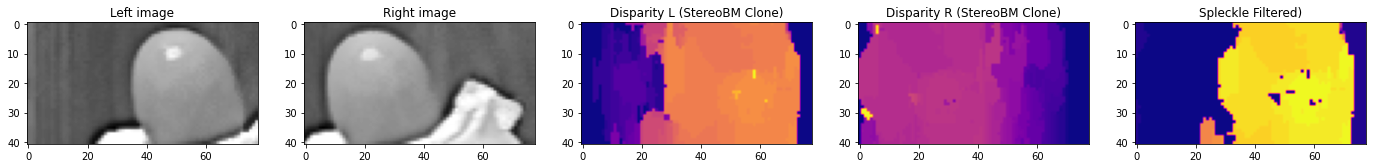

In [110]:
block_size = 15
stereo = StereoBMClone(num_disparities=96, block_size=block_size,
                           uniqueness_ratio=0, pre_filter_cap=31,
                           speckle_window_size=15, speckle_range=3)

half_block = block_size // 2

left_padded = cv2.copyMakeBorder(left_patch, half_block, half_block, half_block, half_block, cv2.BORDER_CONSTANT, value=0)
right_padded= cv2.copyMakeBorder(right_patch, half_block, half_block, half_block, half_block, cv2.BORDER_CONSTANT, value=0)

dispL, dispR, disp_spleckle = stereo.compute(left_padded, right_padded)

plt.figure(figsize=(24,8))
plt.subplot(1,5,1)
plt.title("Left image")
plt.imshow(left_padded[half_block:-half_block, half_block:-half_block], cmap="gray")
plt.subplot(1,5,2)
plt.title("Right image")
plt.imshow(right_padded[half_block:-half_block, half_block:-half_block], cmap="gray")
plt.subplot(1,5,3)
plt.title("Disparity L (StereoBM Clone)")
plt.imshow(dispL[half_block:-half_block, half_block:-half_block], cmap="plasma")
plt.subplot(1,5,4)
plt.title("Disparity R (StereoBM Clone)")
plt.imshow(dispR[half_block:-half_block, half_block:-half_block], cmap="plasma")
plt.subplot(1,5,5)
plt.title("Spleckle Filtered)")
plt.imshow(disp_spleckle[half_block:-half_block, half_block:-half_block], cmap="plasma")
plt.show()


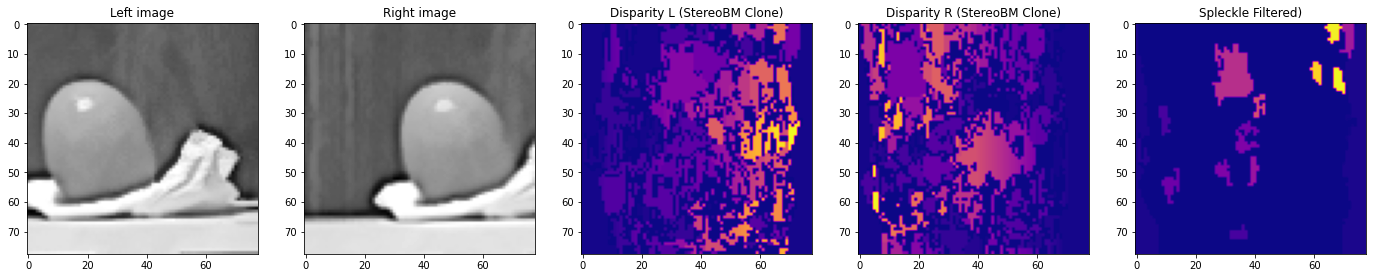

In [65]:
block_size = 15
stereo = StereoBMClone(num_disparities=96, block_size=block_size,
                           uniqueness_ratio=2, pre_filter_cap=31,
                           speckle_window_size=15, speckle_range=3)

half_block = block_size // 2

left_padded = cv2.copyMakeBorder(left_patch, half_block, half_block, half_block, half_block, cv2.BORDER_CONSTANT, value=0)
right_padded= cv2.copyMakeBorder(right_patch, half_block, half_block, half_block, half_block, cv2.BORDER_CONSTANT, value=0)

dispL, dispR, disp_spleckle = stereo.compute(left_padded, right_padded)

plt.figure(figsize=(24,8))
plt.subplot(1,5,1)
plt.title("Left image")
plt.imshow(left_padded[half_block:-half_block, half_block:-half_block], cmap="gray")
plt.subplot(1,5,2)
plt.title("Right image")
plt.imshow(right_padded[half_block:-half_block, half_block:-half_block], cmap="gray")
plt.subplot(1,5,3)
plt.title("Disparity L (StereoBM Clone)")
plt.imshow(dispL[half_block:-half_block, half_block:-half_block], cmap="plasma")
plt.subplot(1,5,4)
plt.title("Disparity R (StereoBM Clone)")
plt.imshow(dispR[half_block:-half_block, half_block:-half_block], cmap="plasma")
plt.subplot(1,5,5)
plt.title("Spleckle Filtered)")
plt.imshow(disp_spleckle[half_block:-half_block, half_block:-half_block], cmap="plasma")
plt.show()


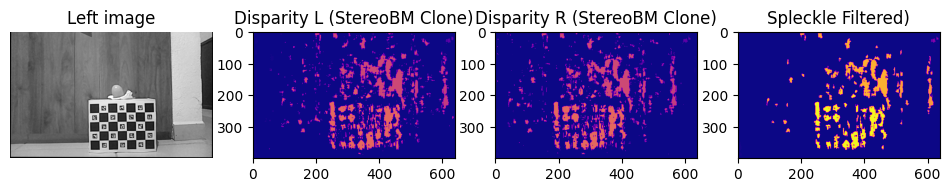

In [25]:
left = cv2.imread(r"F:\tomato_disp_data\1757292281913_left.png", cv2.IMREAD_GRAYSCALE)
right = cv2.imread(r"F:\tomato_disp_data\1757292281913_right.png", cv2.IMREAD_GRAYSCALE)


stereo = StereoBMClone(num_disparities=96, block_size=15,
                        uniqueness_ratio=15,
                        speckle_window_size=35, speckle_range=3)

dispL, dispR, disp_spleckle = stereo.compute(left, right)

plt.figure(figsize=(12,4))
plt.subplot(1,4,1)
plt.title("Left image")
plt.imshow(left, cmap="gray")
plt.axis("off")
plt.subplot(1,4,2)
plt.title("Disparity L (StereoBM Clone)")
plt.imshow(dispL, cmap="plasma")
plt.subplot(1,4,3)
plt.title("Disparity R (StereoBM Clone)")
plt.imshow(dispR, cmap="plasma")
plt.subplot(1,4,4)
plt.title("Spleckle Filtered)")
plt.imshow(disp_spleckle, cmap="plasma")
plt.show()


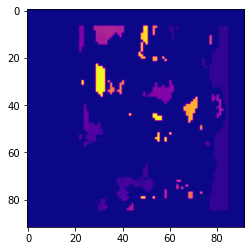

In [86]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
left = cv2.imread(r"C:\Users\Angel\computer-vision\3D\Disparity\imgs\tsukuba_l.png", cv2.IMREAD_GRAYSCALE)
right = cv2.imread(r"C:\Users\Angel\computer-vision\3D\Disparity\imgs\tsukuba_r.png", cv2.IMREAD_GRAYSCALE)


imgL = left_padded
imgR = right_padded

stereo = cv.StereoBM.create(numDisparities=16, blockSize=15)
disparity = stereo.compute(imgL,imgR)
plt.imshow(disparity,'plasma')
plt.show()

Text(0.5, 1.0, 'Disparity (no black border)')

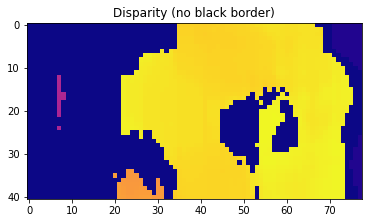

In [111]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

left_cv = left_patch.copy()
right_cv = right_patch.copy()

numDisparities = 96
blockSize = 15

# Add border to both images (left, right, top, bottom)
pad = numDisparities
left_pad = cv2.copyMakeBorder(left_cv, pad, pad, pad, pad, cv2.BORDER_CONSTANT, value=0)
right_pad = cv2.copyMakeBorder(right_cv, pad, pad, pad, pad, cv2.BORDER_CONSTANT, value=0)

stereo = cv.StereoBM.create(numDisparities=numDisparities, blockSize=blockSize)
disparity_full = stereo.compute(left_pad, right_pad)

# Crop back to original size
h, w = left_cv.shape
disparity = disparity_full[pad:pad+h, pad:pad+w]

plt.imshow(disparity, 'plasma')
plt.title("Disparity (no black border)")

Text(0.5, 1.0, 'Disparity (no black border)')

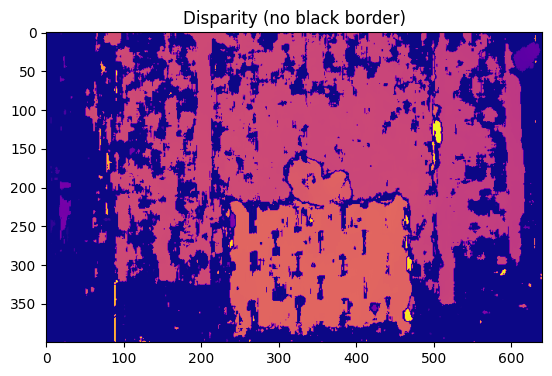

In [32]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

left = cv2.imread(r"F:\tomato_disp_data\1757292281913_left.png", cv2.IMREAD_GRAYSCALE)
right = cv2.imread(r"F:\tomato_disp_data\1757292281913_right.png", cv2.IMREAD_GRAYSCALE)

numDisparities = 96
blockSize = 15

# Add border to both images (left, right, top, bottom)
pad = numDisparities
left_pad = cv2.copyMakeBorder(left, pad, pad, pad, pad, cv2.BORDER_CONSTANT, value=0)
right_pad = cv2.copyMakeBorder(right, pad, pad, pad, pad, cv2.BORDER_CONSTANT, value=0)

stereo = cv.StereoBM.create(numDisparities=numDisparities, blockSize=blockSize)
disparity_full = stereo.compute(left_pad, right_pad)

# Crop back to original size
h, w = left.shape
disparity = disparity_full[pad:pad+h, pad:pad+w]

plt.imshow(disparity, 'plasma')
plt.title("Disparity (no black border)")

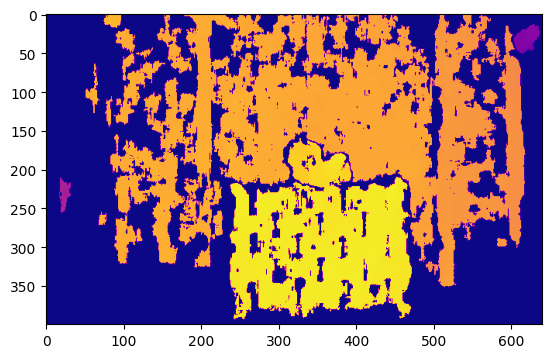

In [34]:
import cv2
import numpy as np

# Load the left and right stereo images
# Replace 'left_image.png' and 'right_image.png' with your actual image paths
imgL = cv2.imread(r"F:\tomato_disp_data\1757292281913_left.png")
imgR = cv2.imread(r"F:\tomato_disp_data\1757292281913_right.png")

# Convert images to grayscale
grayL = cv2.cvtColor(imgL, cv2.COLOR_BGR2GRAY)
grayR = cv2.cvtColor(imgR, cv2.COLOR_BGR2GRAY)
h, w = grayL.shape
# StereoBM parameters
# numDisparities: The disparity search range. Must be divisible by 16.
# blockSize: The size of the blocks compared by the algorithm. Must be odd.
numDisparities = 96  # Example value, adjust as needed
blockSize = 15      # Example value, adjust as needed

pad = numDisparities
grayL = cv2.copyMakeBorder(grayL, pad, pad, pad, pad, cv2.BORDER_CONSTANT, value=0)
grayR = cv2.copyMakeBorder(grayR, pad, pad, pad, pad, cv2.BORDER_CONSTANT, value=0)

# Create a StereoBM object
stereo = cv2.StereoBM_create(numDisparities=numDisparities, blockSize=blockSize)

# Set additional parameters (optional, fine-tune for better results)
stereo.setMinDisparity(0)
stereo.setUniquenessRatio(15)
stereo.setSpeckleWindowSize(100)
stereo.setSpeckleRange(32)
stereo.setDisp12MaxDiff(1)

# Compute the disparity map
disparity_full = stereo.compute(grayL, grayR)

disparity = disparity_full[pad:pad+h, pad:pad+w]

plt.imshow(disparity, 'plasma')

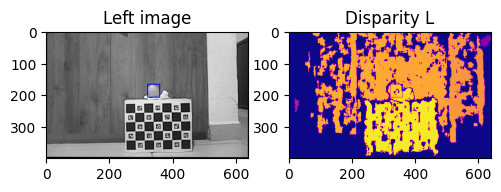

In [36]:
# Example bbox coordinates
x1, y1, x2, y2 = 320, 167, 358, 208

# Copy dispL to avoid modifying original
dispL_bbox = disparity.copy()

# Draw bbox (set border pixels to max value)
v = np.nanmax(dispL_bbox)  # Use max disparity for visibility
dispL_bbox[y1:y2, x1] = 0
dispL_bbox[y1:y2, x2] = 0
dispL_bbox[y1, x1:x2] = 0
dispL_bbox[y2, x1:x2] = 0


plt.figure(figsize=(12,4))
plt.subplot(1,4,1)
plt.title("Left image")
plt.imshow(bgr_img)
plt.subplot(1,4,2)
plt.title("Disparity L")
plt.imshow(dispL_bbox, cmap="plasma")
plt.show()

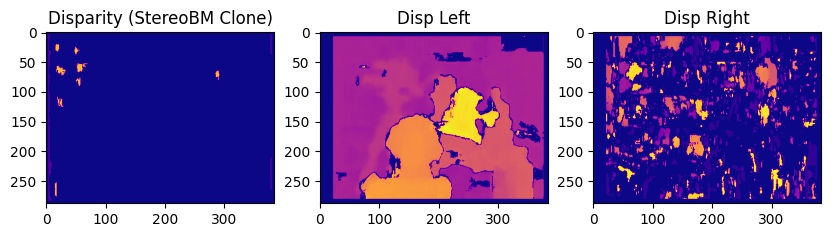

In [95]:
# Compute disparities in both directions
stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)
dispL = stereo.compute(left_img, right_img).astype(np.float32) / 16.0
dispR = stereo.compute(right_img, left_img).astype(np.float32) / 16.0

# Left-right consistency check
def lr_consistency(dispL, dispR, threshold=1.0):
    h, w = dispL.shape
    disp_final = np.full_like(dispL, np.nan, dtype=np.float32)
    for y in range(h):
        for x in range(w):
            dL = dispL[y, x]
            xR = int(x - dL)
            if 0 <= xR < w:
                dR = dispR[y, xR]
                if abs(dL - dR) <= threshold:
                    disp_final[y, x] = dL
    return disp_final

disp_final = lr_consistency(dispL, dispR, threshold=1.0)

# Visualization
disp_vis = np.nan_to_num(disp_final, nan=0.0)
disp_vis = cv2.normalize(disp_vis, None, 0, 255, cv2.NORM_MINMAX)
disp_vis = np.uint8(disp_vis)

plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
plt.title("Disparity (StereoBM Clone)")
plt.imshow(disp, cmap="plasma")
plt.subplot(1,3,2)
plt.title("Disp Left")
plt.imshow(dispL, cmap="plasma")
plt.subplot(1,3,3)
plt.title("Disp Right")
plt.imshow(dispR, cmap="plasma")
# plt.colorbar()
# plt.axis("off")
plt.show()


SAD;     NCC;    ZNCC

In [118]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from collections import deque

class StereoBMClone:
    def __init__(self, num_disparities=16, block_size=9,
                 uniqueness_ratio=15, pre_filter_cap=31,
                 speckle_window_size=50, speckle_range=1,
                 similarity="SAD", prefilter_type="sobel"):  # add prefilter_type
        self.num_disparities = num_disparities
        self.block_size = block_size
        self.uniqueness_ratio = uniqueness_ratio
        self.pre_filter_cap = pre_filter_cap
        self.speckle_window_size = speckle_window_size
        self.speckle_range = speckle_range
        self.similarity = similarity.upper()
        self.prefilter_type = prefilter_type.lower()

    # ---------------- Similarity metrics ----------------
    def _sad_cost(self, left_patch, right_patch):
        return np.sum(np.abs(left_patch - right_patch))

    def _ncc_cost(self, left_patch, right_patch):
        L = left_patch.flatten().astype(np.float32)
        R = right_patch.flatten().astype(np.float32)
        num = np.sum(L * R)
        den = np.sqrt(np.sum(L**2) * np.sum(R**2))
        if den == 0:
            return -1.0
        return num / den  # [-1,1]

    def _zncc_cost(self, left_patch, right_patch):
        L = left_patch.flatten().astype(np.float32)
        R = right_patch.flatten().astype(np.float32)
        L_mean = np.mean(L)
        R_mean = np.mean(R)
        num = np.sum((L - L_mean) * (R - R_mean))
        den = np.sqrt(np.sum((L - L_mean)**2) * np.sum((R - R_mean)**2))
        if den == 0:
            return -1.0
        return num / den  # [-1,1]

    def _compute_cost(self, left_patch, right_patch):
        if self.similarity == "SAD":
            cost = self._sad_cost(left_patch, right_patch)
            return cost, True   # minimize
        elif self.similarity == "NCC":
            score = self._ncc_cost(left_patch, right_patch)
            return -score, True  # invert to use minimize logic
        elif self.similarity == "ZNCC":
            score = self._zncc_cost(left_patch, right_patch)
            return -score, True  # invert to use minimize logic
        else:
            raise ValueError(f"Unknown similarity metric: {self.similarity}")

    # ---------------- Prefilter ----------------
    def prefilter(self, img):
        if self.prefilter_type == "sobel":
            sobel = cv2.Sobel(img, cv2.CV_16S, 1, 0, ksize=3)
            sobel = np.clip(sobel, -self.pre_filter_cap, self.pre_filter_cap)
            sobel = cv2.convertScaleAbs(sobel)
            return sobel
        elif self.prefilter_type == "sobel_eq":
            img = cv2.equalizeHist(img)
            img = cv2.GaussianBlur(img, (5, 5), 0)
            sobel = cv2.Sobel(img, cv2.CV_16S, 1, 0, ksize=3)
            sobel = np.clip(sobel, -self.pre_filter_cap, self.pre_filter_cap)
            sobel = cv2.convertScaleAbs(sobel)
            return sobel
        elif self.prefilter_type == "canny":
            # You can tune thresholds as needed
            img = cv2.equalizeHist(img)
            img = cv2.GaussianBlur(img, (5, 5), 0)
            edges = cv2.Canny(img, 50, 150)
            return img
        elif self.prefilter_type == "hist_eq":
            # You can tune thresholds as needed
            img = cv2.equalizeHist(img)
            img = cv2.GaussianBlur(img, (5, 5), 0)
            return img
        else:
            raise ValueError(f"Unknown prefilter type: {self.prefilter_type}")

    # ---------------- Block matching ----------------
    def block_match(self, left, right):
        h, w = left.shape
        disp_map = np.full((h, w), -1, dtype=np.float32)
        half = self.block_size // 2

        for y in range(half, h-half):
            for x in range(half, w-half):
                left_patch = left[y-half:y+half+1, x-half:x+half+1].astype(np.int32)

                best_cost = np.inf
                second_best = np.inf
                best_d = -1

                for d in range(self.num_disparities):
                    xr = x - d
                    if xr - half < 0:
                        continue
                    right_patch = right[y-half:y+half+1, xr-half:xr+half+1].astype(np.int32)

                    cost, _ = self._compute_cost(left_patch, right_patch)

                    if cost < best_cost:
                        second_best = best_cost
                        best_cost = cost
                        best_d = d
                    elif cost < second_best:
                        second_best = cost

                if best_d >= 0 and second_best < np.inf:
                    if best_cost <= (1 - self.uniqueness_ratio/100.0) * second_best:
                        disp_map[y, x] = best_d
                elif best_d >= 0:
                    disp_map[y, x] = best_d

        return disp_map

    def block_match_right(self, left, right):
        h, w = left.shape
        disp_map = np.full((h, w), -1, dtype=np.float32)
        half = self.block_size // 2

        for y in range(half, h-half):
            for x in range(half, w-half):
                right_patch = right[y-half:y+half+1, x-half:x+half+1].astype(np.int32)

                best_cost = np.inf
                second_best = np.inf
                best_d = -1

                for d in range(self.num_disparities):
                    xl = x + d
                    if xl + half >= w:
                        continue
                    left_patch = left[y-half:y+half+1, xl-half:xl+half+1].astype(np.int32)

                    cost, _ = self._compute_cost(left_patch, right_patch)

                    if cost < best_cost:
                        second_best = best_cost
                        best_cost = cost
                        best_d = d
                    elif cost < second_best:
                        second_best = cost

                if best_d >= 0 and second_best < np.inf:
                    if best_cost <= (1 - self.uniqueness_ratio/100.0) * second_best:
                        disp_map[y, x] = best_d
                elif best_d >= 0:
                    disp_map[y, x] = best_d

        return disp_map

    # ---------------- Left-right consistency ----------------
    def left_right_consistency(self, dL, dR, tol=1):
        h, w = dL.shape
        mask = np.ones_like(dL, dtype=bool)
        for y in range(h):
            for x in range(w):
                d = dL[y, x]
                if d < 0:
                    mask[y, x] = False
                    continue
                xr = int(round(x - d))
                if xr < 0 or xr >= w:
                    mask[y, x] = False
                    continue
                d_r = dR[y, xr]
                if d_r < 0 or abs(d - d_r) > tol:
                    mask[y, x] = False
        out = np.where(mask, dL, -1)
        return out

    # ---------------- Speckle filtering ----------------
    def speckle_filter(self, disp):
        h, w = disp.shape
        visited = np.zeros((h, w), dtype=bool)
        output = disp.copy()

        def bfs(sy, sx):
            q = deque()
            q.append((sy, sx))
            pixels = [(sy, sx)]
            visited[sy, sx] = True
            d0 = disp[sy, sx]

            while q:
                y, x = q.popleft()
                for dy, dx in [(-1,0),(1,0),(0,-1),(0,1)]:
                    ny, nx = y+dy, x+dx
                    if 0 <= ny < h and 0 <= nx < w:
                        if not visited[ny, nx] and disp[ny, nx] >= 0:
                            if abs(disp[ny, nx] - d0) <= self.speckle_range:
                                visited[ny, nx] = True
                                q.append((ny, nx))
                                pixels.append((ny, nx))
            return pixels

        for y in range(h):
            for x in range(w):
                if disp[y, x] >= 0 and not visited[y, x]:
                    comp = bfs(y, x)
                    if len(comp) < self.speckle_window_size:
                        for (cy, cx) in comp:
                            output[cy, cx] = -2
        mask = (output == -2).astype(np.uint8)
        disp_filled = cv2.inpaint(np.float32(output), mask, inpaintRadius=1, flags=cv2.INPAINT_NS)
        return disp_filled

    # ---------------- Full pipeline ----------------
    def compute(self, left, right):
        left_f = self.prefilter(left)
        right_f = self.prefilter(right)

        dispL = self.block_match(left_f, right_f)
        dispR = self.block_match_right(left_f, right_f)

        dispLR = self.left_right_consistency(dispL, dispR, tol=2)

        dispL_speckle = self.speckle_filter(dispLR)

        return dispL, dispR, dispL_speckle


# if __name__ == "__main__":
    # Example usage
    # left = cv2.imread(r"F:\tomato_disp_data\1757292281913_left.png", cv2.IMREAD_GRAYSCALE)
    # right = cv2.imread(r"F:\tomato_disp_data\1757292281913_right.png", cv2.IMREAD_GRAYSCALE)

    # stereo = StereoBMClone(num_disparities=96, block_size=15,
    #                        uniqueness_ratio=5, pre_filter_cap=31,
    #                        speckle_window_size=35, speckle_range=3,
    #                        similarity="SAD")   # choose "SAD", "NCC", "ZNCC"

    # dispL, dispR, disp_speckle = stereo.compute(left, right)

    # plt.figure(figsize=(12,4))
    # plt.subplot(1,4,1); plt.title("Left image"); plt.imshow(left, cmap="gray")
    # plt.subplot(1,4,2); plt.title("Disparity L"); plt.imshow(dispL, cmap="plasma")
    # plt.subplot(1,4,3); plt.title("Disparity R"); plt.imshow(dispR, cmap="plasma")
    # plt.subplot(1,4,4); plt.title("Speckle Filtered"); plt.imshow(disp_speckle, cmap="plasma")
    # plt.show()


### SAD

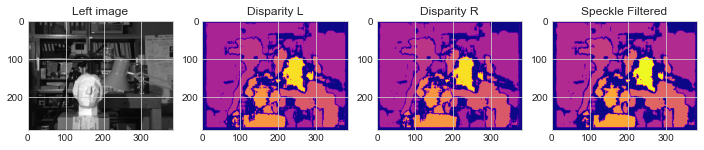

Mean Squared Error (MSE): 19.93
Mean Absolute Error (MAE): 2.20
Bad Pixel Percentage (Lower is Better): 27.31%
Correctness on Valid Estimates (Higher is Better): 97.05%


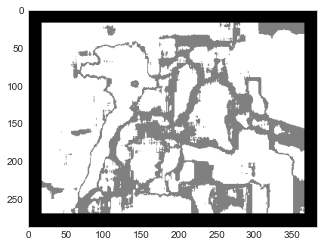

In [119]:
left = cv2.imread(r"C:\Users\Angel\computer-vision\3D\Disparity\imgs\tsukuba_l.png", cv2.IMREAD_GRAYSCALE)
right = cv2.imread(r"C:\Users\Angel\computer-vision\3D\Disparity\imgs\tsukuba_r.png", cv2.IMREAD_GRAYSCALE)
stereo = StereoBMClone(num_disparities=16, block_size=15,
                           uniqueness_ratio=15, pre_filter_cap=31,
                           speckle_window_size=35, speckle_range=3,
                           similarity="SAD", prefilter_type='sobel')   # choose "SAD", "NCC", "ZNCC"

dispL, dispR, disp_speckle = stereo.compute(left, right)

plt.figure(figsize=(12,4))
plt.subplot(1,4,1); plt.title("Left image"); plt.imshow(left, cmap="gray")
plt.subplot(1,4,2); plt.title("Disparity L"); plt.imshow(dispL, cmap="plasma")
plt.subplot(1,4,3); plt.title("Disparity R"); plt.imshow(dispR, cmap="plasma")
plt.subplot(1,4,4); plt.title("Speckle Filtered"); plt.imshow(disp_speckle, cmap="plasma")
plt.show()

comparison_result = compare_disparity_maps(gt_disp/16.0, dispL, bad_pixel_threshold=1)
if comparison_result:
    error_metrics, sim_map = comparison_result
    
    print(f"Mean Squared Error (MSE): {error_metrics['mse']:.2f}")
    print(f"Mean Absolute Error (MAE): {error_metrics['mae']:.2f}")
    print(f"Bad Pixel Percentage (Lower is Better): {error_metrics['bad_pixel_percentage']:.2f}%")
    print(f"Correctness on Valid Estimates (Higher is Better): {error_metrics['correct_est_percentage']:.2f}%")
    plt.grid(False)
    plt.imshow(sim_map, 'gray')

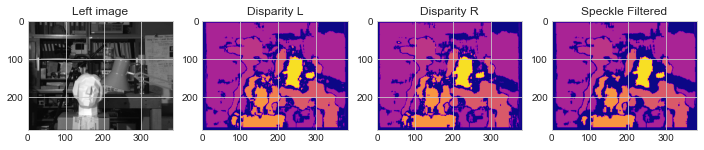

Mean Squared Error (MSE): 20.71
Mean Absolute Error (MAE): 2.24
Bad Pixel Percentage (Lower is Better): 27.49%
Correctness on Valid Estimates (Higher is Better): 97.50%


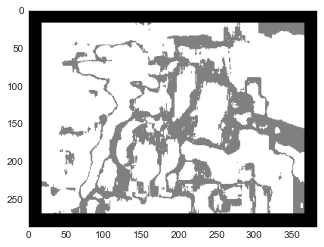

In [120]:
left = cv2.imread(r"C:\Users\Angel\computer-vision\3D\Disparity\imgs\tsukuba_l.png", cv2.IMREAD_GRAYSCALE)
right = cv2.imread(r"C:\Users\Angel\computer-vision\3D\Disparity\imgs\tsukuba_r.png", cv2.IMREAD_GRAYSCALE)
stereo = StereoBMClone(num_disparities=16, block_size=15,
                           uniqueness_ratio=15, pre_filter_cap=31,
                           speckle_window_size=100, speckle_range=32,
                           similarity="SAD", prefilter_type='sobel_eq')   # choose "SAD", "NCC", "ZNCC"

dispL, dispR, disp_speckle = stereo.compute(left, right)

plt.figure(figsize=(12,4))
plt.subplot(1,4,1); plt.title("Left image"); plt.imshow(left, cmap="gray")
plt.subplot(1,4,2); plt.title("Disparity L"); plt.imshow(dispL, cmap="plasma")
plt.subplot(1,4,3); plt.title("Disparity R"); plt.imshow(dispR, cmap="plasma")
plt.subplot(1,4,4); plt.title("Speckle Filtered"); plt.imshow(disp_speckle, cmap="plasma")
plt.show()

comparison_result = compare_disparity_maps(gt_disp/16.0, dispL, bad_pixel_threshold=1)
if comparison_result:
    error_metrics, sim_map = comparison_result
    
    print(f"Mean Squared Error (MSE): {error_metrics['mse']:.2f}")
    print(f"Mean Absolute Error (MAE): {error_metrics['mae']:.2f}")
    print(f"Bad Pixel Percentage (Lower is Better): {error_metrics['bad_pixel_percentage']:.2f}%")
    print(f"Correctness on Valid Estimates (Higher is Better): {error_metrics['correct_est_percentage']:.2f}%")
    plt.grid(False)
    plt.imshow(sim_map, 'gray')

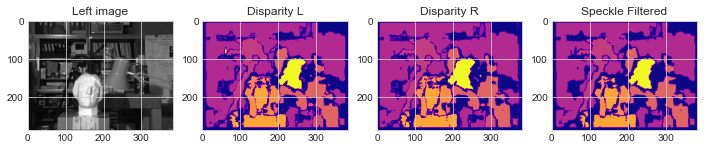

Mean Squared Error (MSE): 21.13
Mean Absolute Error (MAE): 2.41
Bad Pixel Percentage (Lower is Better): 30.54%
Correctness on Valid Estimates (Higher is Better): 96.30%


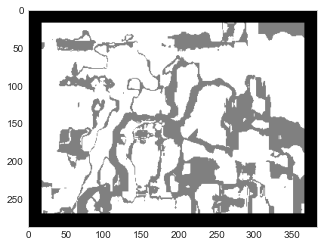

In [121]:
left = cv2.imread(r"C:\Users\Angel\computer-vision\3D\Disparity\imgs\tsukuba_l.png", cv2.IMREAD_GRAYSCALE)
right = cv2.imread(r"C:\Users\Angel\computer-vision\3D\Disparity\imgs\tsukuba_r.png", cv2.IMREAD_GRAYSCALE)
stereo = StereoBMClone(num_disparities=16, block_size=15,
                           uniqueness_ratio=15, pre_filter_cap=31,
                           speckle_window_size=100, speckle_range=32,
                           similarity="SAD", prefilter_type='hist_eq')   # choose "SAD", "NCC", "ZNCC"

dispL, dispR, disp_speckle = stereo.compute(left, right)

plt.figure(figsize=(12,4))
plt.subplot(1,4,1); plt.title("Left image"); plt.imshow(left, cmap="gray")
plt.subplot(1,4,2); plt.title("Disparity L"); plt.imshow(dispL, cmap="plasma")
plt.subplot(1,4,3); plt.title("Disparity R"); plt.imshow(dispR, cmap="plasma")
plt.subplot(1,4,4); plt.title("Speckle Filtered"); plt.imshow(disp_speckle, cmap="plasma")
plt.show()

comparison_result = compare_disparity_maps(gt_disp/16.0, dispL, bad_pixel_threshold=1)
if comparison_result:
    error_metrics, sim_map = comparison_result
    
    print(f"Mean Squared Error (MSE): {error_metrics['mse']:.2f}")
    print(f"Mean Absolute Error (MAE): {error_metrics['mae']:.2f}")
    print(f"Bad Pixel Percentage (Lower is Better): {error_metrics['bad_pixel_percentage']:.2f}%")
    print(f"Correctness on Valid Estimates (Higher is Better): {error_metrics['correct_est_percentage']:.2f}%")
    plt.grid(False)
    plt.imshow(sim_map, 'gray')

### NCC

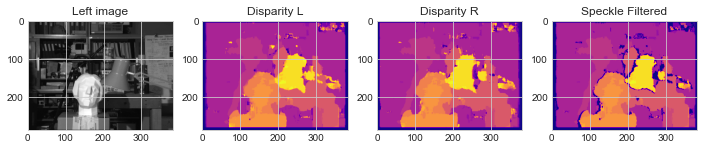

In [97]:
left = cv2.imread(r"C:\Users\Angel\computer-vision\3D\Disparity\imgs\tsukuba_l.png", cv2.IMREAD_GRAYSCALE)
right = cv2.imread(r"C:\Users\Angel\computer-vision\3D\Disparity\imgs\tsukuba_r.png", cv2.IMREAD_GRAYSCALE)
stereo = StereoBMClone(num_disparities=16, block_size=15,
                           uniqueness_ratio=15, pre_filter_cap=31,
                           speckle_window_size=35, speckle_range=3,
                           similarity="NCC", prefilter_type='sobel')   # choose "SAD", "NCC", "ZNCC"

dispL, dispR, disp_speckle = stereo.compute(left, right)

plt.figure(figsize=(12,4))
plt.subplot(1,4,1); plt.title("Left image"); plt.imshow(left, cmap="gray")
plt.subplot(1,4,2); plt.title("Disparity L"); plt.imshow(dispL, cmap="plasma")
plt.subplot(1,4,3); plt.title("Disparity R"); plt.imshow(dispR, cmap="plasma")
plt.subplot(1,4,4); plt.title("Speckle Filtered"); plt.imshow(disp_speckle, cmap="plasma")
plt.show()

Mean Squared Error (MSE): 2.86
Mean Absolute Error (MAE): 0.55
Bad Pixel Percentage (Lower is Better): 10.10%
Correctness on Valid Estimates (Higher is Better): 90.22%


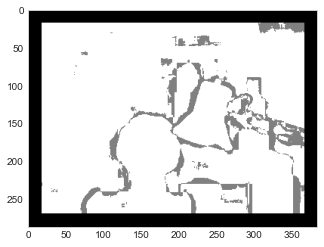

In [98]:
comparison_result = compare_disparity_maps(gt_disp/16.0, dispL, bad_pixel_threshold=1)
if comparison_result:
    error_metrics, sim_map = comparison_result
    
    print(f"Mean Squared Error (MSE): {error_metrics['mse']:.2f}")
    print(f"Mean Absolute Error (MAE): {error_metrics['mae']:.2f}")
    print(f"Bad Pixel Percentage (Lower is Better): {error_metrics['bad_pixel_percentage']:.2f}%")
    print(f"Correctness on Valid Estimates (Higher is Better): {error_metrics['correct_est_percentage']:.2f}%")
    plt.grid(False)
    plt.imshow(sim_map, 'gray')

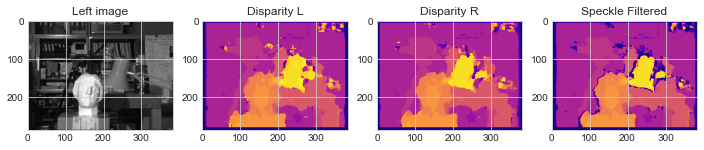

Mean Squared Error (MSE): 3.04
Mean Absolute Error (MAE): 0.58
Bad Pixel Percentage (Lower is Better): 10.22%
Correctness on Valid Estimates (Higher is Better): 90.12%


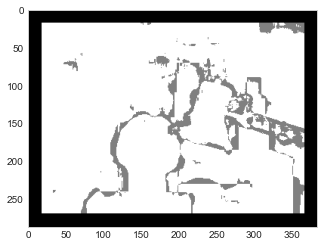

In [99]:
left = cv2.imread(r"C:\Users\Angel\computer-vision\3D\Disparity\imgs\tsukuba_l.png", cv2.IMREAD_GRAYSCALE)
right = cv2.imread(r"C:\Users\Angel\computer-vision\3D\Disparity\imgs\tsukuba_r.png", cv2.IMREAD_GRAYSCALE)
stereo = StereoBMClone(num_disparities=16, block_size=15,
                           uniqueness_ratio=15, pre_filter_cap=31,
                           speckle_window_size=35, speckle_range=3,
                           similarity="NCC", prefilter_type='sobel_eq')   # choose "SAD", "NCC", "ZNCC"

dispL, dispR, disp_speckle = stereo.compute(left, right)

plt.figure(figsize=(12,4))
plt.subplot(1,4,1); plt.title("Left image"); plt.imshow(left, cmap="gray")
plt.subplot(1,4,2); plt.title("Disparity L"); plt.imshow(dispL, cmap="plasma")
plt.subplot(1,4,3); plt.title("Disparity R"); plt.imshow(dispR, cmap="plasma")
plt.subplot(1,4,4); plt.title("Speckle Filtered"); plt.imshow(disp_speckle, cmap="plasma")
plt.show()

comparison_result = compare_disparity_maps(gt_disp/16.0, dispL, bad_pixel_threshold=1)
if comparison_result:
    error_metrics, sim_map = comparison_result
    
    print(f"Mean Squared Error (MSE): {error_metrics['mse']:.2f}")
    print(f"Mean Absolute Error (MAE): {error_metrics['mae']:.2f}")
    print(f"Bad Pixel Percentage (Lower is Better): {error_metrics['bad_pixel_percentage']:.2f}%")
    print(f"Correctness on Valid Estimates (Higher is Better): {error_metrics['correct_est_percentage']:.2f}%")
    plt.grid(False)
    plt.imshow(sim_map, 'gray')

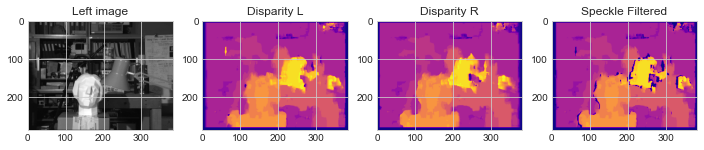

Mean Squared Error (MSE): 2.59
Mean Absolute Error (MAE): 0.62
Bad Pixel Percentage (Lower is Better): 11.82%
Correctness on Valid Estimates (Higher is Better): 88.38%


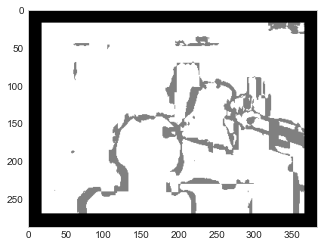

In [100]:
left = cv2.imread(r"C:\Users\Angel\computer-vision\3D\Disparity\imgs\tsukuba_l.png", cv2.IMREAD_GRAYSCALE)
right = cv2.imread(r"C:\Users\Angel\computer-vision\3D\Disparity\imgs\tsukuba_r.png", cv2.IMREAD_GRAYSCALE)
stereo = StereoBMClone(num_disparities=16, block_size=15,
                           uniqueness_ratio=15, pre_filter_cap=31,
                           speckle_window_size=35, speckle_range=3,
                           similarity="NCC", prefilter_type='hist_eq')   # choose "SAD", "NCC", "ZNCC"

dispL, dispR, disp_speckle = stereo.compute(left, right)

plt.figure(figsize=(12,4))
plt.subplot(1,4,1); plt.title("Left image"); plt.imshow(left, cmap="gray")
plt.subplot(1,4,2); plt.title("Disparity L"); plt.imshow(dispL, cmap="plasma")
plt.subplot(1,4,3); plt.title("Disparity R"); plt.imshow(dispR, cmap="plasma")
plt.subplot(1,4,4); plt.title("Speckle Filtered"); plt.imshow(disp_speckle, cmap="plasma")
plt.show()

comparison_result = compare_disparity_maps(gt_disp/16.0, dispL, bad_pixel_threshold=1)
if comparison_result:
    error_metrics, sim_map = comparison_result
    
    print(f"Mean Squared Error (MSE): {error_metrics['mse']:.2f}")
    print(f"Mean Absolute Error (MAE): {error_metrics['mae']:.2f}")
    print(f"Bad Pixel Percentage (Lower is Better): {error_metrics['bad_pixel_percentage']:.2f}%")
    print(f"Correctness on Valid Estimates (Higher is Better): {error_metrics['correct_est_percentage']:.2f}%")
    plt.grid(False)
    plt.imshow(sim_map, 'gray')

### ZNCC

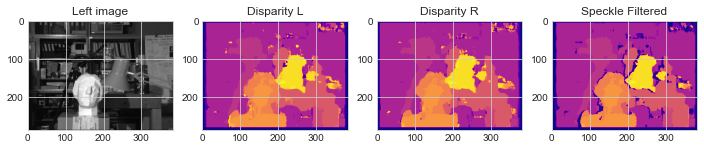

Mean Squared Error (MSE): 3.03
Mean Absolute Error (MAE): 0.57
Bad Pixel Percentage (Lower is Better): 10.25%
Correctness on Valid Estimates (Higher is Better): 90.05%


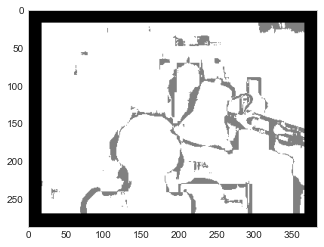

In [101]:
left = cv2.imread(r"C:\Users\Angel\computer-vision\3D\Disparity\imgs\tsukuba_l.png", cv2.IMREAD_GRAYSCALE)
right = cv2.imread(r"C:\Users\Angel\computer-vision\3D\Disparity\imgs\tsukuba_r.png", cv2.IMREAD_GRAYSCALE)
stereo = StereoBMClone(num_disparities=16, block_size=15,
                           uniqueness_ratio=15, pre_filter_cap=31,
                           speckle_window_size=35, speckle_range=3,
                           similarity="ZNCC", prefilter_type='sobel')   # choose "SAD", "NCC", "ZNCC"

dispL, dispR, disp_speckle = stereo.compute(left, right)

plt.figure(figsize=(12,4))
plt.subplot(1,4,1); plt.title("Left image"); plt.imshow(left, cmap="gray")
plt.subplot(1,4,2); plt.title("Disparity L"); plt.imshow(dispL, cmap="plasma")
plt.subplot(1,4,3); plt.title("Disparity R"); plt.imshow(dispR, cmap="plasma")
plt.subplot(1,4,4); plt.title("Speckle Filtered"); plt.imshow(disp_speckle, cmap="plasma")
plt.show()

comparison_result = compare_disparity_maps(gt_disp/16.0, dispL, bad_pixel_threshold=1)
if comparison_result:
    error_metrics, sim_map = comparison_result
    
    print(f"Mean Squared Error (MSE): {error_metrics['mse']:.2f}")
    print(f"Mean Absolute Error (MAE): {error_metrics['mae']:.2f}")
    print(f"Bad Pixel Percentage (Lower is Better): {error_metrics['bad_pixel_percentage']:.2f}%")
    print(f"Correctness on Valid Estimates (Higher is Better): {error_metrics['correct_est_percentage']:.2f}%")
    plt.grid(False)
    plt.imshow(sim_map, 'gray')

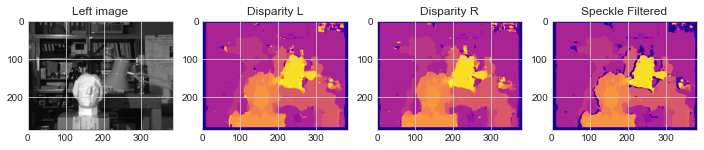

Mean Squared Error (MSE): 2.92
Mean Absolute Error (MAE): 0.56
Bad Pixel Percentage (Lower is Better): 10.06%
Correctness on Valid Estimates (Higher is Better): 90.17%


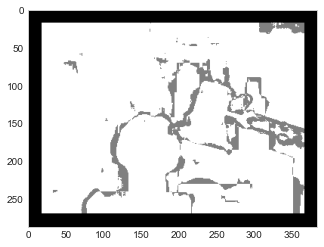

In [102]:
left = cv2.imread(r"C:\Users\Angel\computer-vision\3D\Disparity\imgs\tsukuba_l.png", cv2.IMREAD_GRAYSCALE)
right = cv2.imread(r"C:\Users\Angel\computer-vision\3D\Disparity\imgs\tsukuba_r.png", cv2.IMREAD_GRAYSCALE)
stereo = StereoBMClone(num_disparities=16, block_size=15,
                           uniqueness_ratio=15, pre_filter_cap=31,
                           speckle_window_size=35, speckle_range=3,
                           similarity="ZNCC", prefilter_type='sobel_eq')   # choose "SAD", "NCC", "ZNCC"

dispL, dispR, disp_speckle = stereo.compute(left, right)

plt.figure(figsize=(12,4))
plt.subplot(1,4,1); plt.title("Left image"); plt.imshow(left, cmap="gray")
plt.subplot(1,4,2); plt.title("Disparity L"); plt.imshow(dispL, cmap="plasma")
plt.subplot(1,4,3); plt.title("Disparity R"); plt.imshow(dispR, cmap="plasma")
plt.subplot(1,4,4); plt.title("Speckle Filtered"); plt.imshow(disp_speckle, cmap="plasma")
plt.show()

comparison_result = compare_disparity_maps(gt_disp/16.0, dispL, bad_pixel_threshold=1)
if comparison_result:
    error_metrics, sim_map = comparison_result
    
    print(f"Mean Squared Error (MSE): {error_metrics['mse']:.2f}")
    print(f"Mean Absolute Error (MAE): {error_metrics['mae']:.2f}")
    print(f"Bad Pixel Percentage (Lower is Better): {error_metrics['bad_pixel_percentage']:.2f}%")
    print(f"Correctness on Valid Estimates (Higher is Better): {error_metrics['correct_est_percentage']:.2f}%")
    plt.grid(False)
    plt.imshow(sim_map, 'gray')

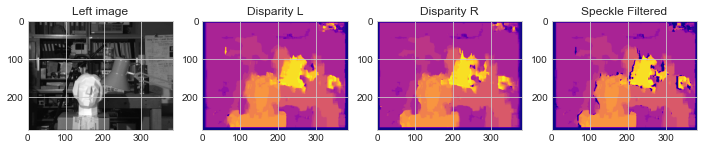

Mean Squared Error (MSE): 2.65
Mean Absolute Error (MAE): 0.61
Bad Pixel Percentage (Lower is Better): 11.59%
Correctness on Valid Estimates (Higher is Better): 88.54%


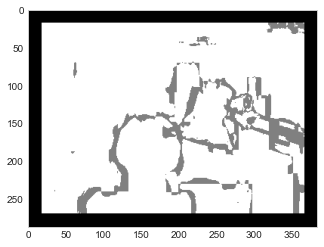

In [103]:
left = cv2.imread(r"C:\Users\Angel\computer-vision\3D\Disparity\imgs\tsukuba_l.png", cv2.IMREAD_GRAYSCALE)
right = cv2.imread(r"C:\Users\Angel\computer-vision\3D\Disparity\imgs\tsukuba_r.png", cv2.IMREAD_GRAYSCALE)
stereo = StereoBMClone(num_disparities=16, block_size=15,
                           uniqueness_ratio=15, pre_filter_cap=31,
                           speckle_window_size=35, speckle_range=3,
                           similarity="ZNCC", prefilter_type='hist_eq')   # choose "SAD", "NCC", "ZNCC"

dispL, dispR, disp_speckle = stereo.compute(left, right)

plt.figure(figsize=(12,4))
plt.subplot(1,4,1); plt.title("Left image"); plt.imshow(left, cmap="gray")
plt.subplot(1,4,2); plt.title("Disparity L"); plt.imshow(dispL, cmap="plasma")
plt.subplot(1,4,3); plt.title("Disparity R"); plt.imshow(dispR, cmap="plasma")
plt.subplot(1,4,4); plt.title("Speckle Filtered"); plt.imshow(disp_speckle, cmap="plasma")
plt.show()

comparison_result = compare_disparity_maps(gt_disp/16.0, dispL, bad_pixel_threshold=1)
if comparison_result:
    error_metrics, sim_map = comparison_result
    
    print(f"Mean Squared Error (MSE): {error_metrics['mse']:.2f}")
    print(f"Mean Absolute Error (MAE): {error_metrics['mae']:.2f}")
    print(f"Bad Pixel Percentage (Lower is Better): {error_metrics['bad_pixel_percentage']:.2f}%")
    print(f"Correctness on Valid Estimates (Higher is Better): {error_metrics['correct_est_percentage']:.2f}%")
    plt.grid(False)
    plt.imshow(sim_map, 'gray')

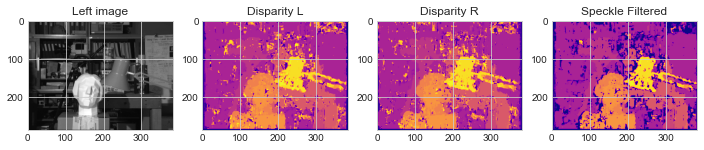

Mean Squared Error (MSE): 6.60
Mean Absolute Error (MAE): 1.11
Bad Pixel Percentage (Lower is Better): 19.26%
Correctness on Valid Estimates (Higher is Better): 81.86%


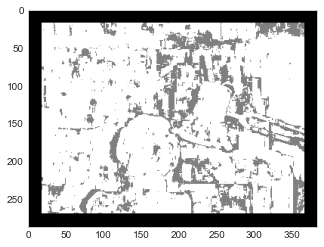

In [105]:
left = cv2.imread(r"C:\Users\Angel\computer-vision\3D\Disparity\imgs\tsukuba_l.png", cv2.IMREAD_GRAYSCALE)
right = cv2.imread(r"C:\Users\Angel\computer-vision\3D\Disparity\imgs\tsukuba_r.png", cv2.IMREAD_GRAYSCALE)
stereo = StereoBMClone(num_disparities=16, block_size=7,
                           uniqueness_ratio=15, pre_filter_cap=31,
                           speckle_window_size=35, speckle_range=3,
                           similarity="ZNCC", prefilter_type='sobel')   # choose "SAD", "NCC", "ZNCC"

dispL, dispR, disp_speckle = stereo.compute(left, right)

plt.figure(figsize=(12,4))
plt.subplot(1,4,1); plt.title("Left image"); plt.imshow(left, cmap="gray")
plt.subplot(1,4,2); plt.title("Disparity L"); plt.imshow(dispL, cmap="plasma")
plt.subplot(1,4,3); plt.title("Disparity R"); plt.imshow(dispR, cmap="plasma")
plt.subplot(1,4,4); plt.title("Speckle Filtered"); plt.imshow(disp_speckle, cmap="plasma")
plt.show()

comparison_result = compare_disparity_maps(gt_disp/16.0, dispL, bad_pixel_threshold=1)
if comparison_result:
    error_metrics, sim_map = comparison_result
    
    print(f"Mean Squared Error (MSE): {error_metrics['mse']:.2f}")
    print(f"Mean Absolute Error (MAE): {error_metrics['mae']:.2f}")
    print(f"Bad Pixel Percentage (Lower is Better): {error_metrics['bad_pixel_percentage']:.2f}%")
    print(f"Correctness on Valid Estimates (Higher is Better): {error_metrics['correct_est_percentage']:.2f}%")
    plt.grid(False)
    plt.imshow(sim_map, 'gray')

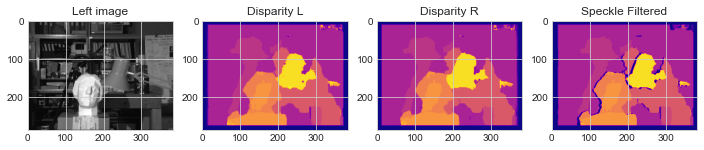

Mean Squared Error (MSE): 2.79
Mean Absolute Error (MAE): 0.53
Bad Pixel Percentage (Lower is Better): 9.72%
Correctness on Valid Estimates (Higher is Better): 90.30%


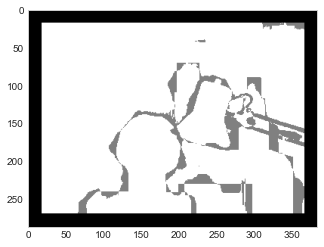

In [106]:
left = cv2.imread(r"C:\Users\Angel\computer-vision\3D\Disparity\imgs\tsukuba_l.png", cv2.IMREAD_GRAYSCALE)
right = cv2.imread(r"C:\Users\Angel\computer-vision\3D\Disparity\imgs\tsukuba_r.png", cv2.IMREAD_GRAYSCALE)
stereo = StereoBMClone(num_disparities=16, block_size=25,
                           uniqueness_ratio=15, pre_filter_cap=31,
                           speckle_window_size=35, speckle_range=3,
                           similarity="ZNCC", prefilter_type='sobel')   # choose "SAD", "NCC", "ZNCC"

dispL, dispR, disp_speckle = stereo.compute(left, right)

plt.figure(figsize=(12,4))
plt.subplot(1,4,1); plt.title("Left image"); plt.imshow(left, cmap="gray")
plt.subplot(1,4,2); plt.title("Disparity L"); plt.imshow(dispL, cmap="plasma")
plt.subplot(1,4,3); plt.title("Disparity R"); plt.imshow(dispR, cmap="plasma")
plt.subplot(1,4,4); plt.title("Speckle Filtered"); plt.imshow(disp_speckle, cmap="plasma")
plt.show()

comparison_result = compare_disparity_maps(gt_disp/16.0, dispL, bad_pixel_threshold=1)
if comparison_result:
    error_metrics, sim_map = comparison_result
    
    print(f"Mean Squared Error (MSE): {error_metrics['mse']:.2f}")
    print(f"Mean Absolute Error (MAE): {error_metrics['mae']:.2f}")
    print(f"Bad Pixel Percentage (Lower is Better): {error_metrics['bad_pixel_percentage']:.2f}%")
    print(f"Correctness on Valid Estimates (Higher is Better): {error_metrics['correct_est_percentage']:.2f}%")
    plt.grid(False)
    plt.imshow(sim_map, 'gray')

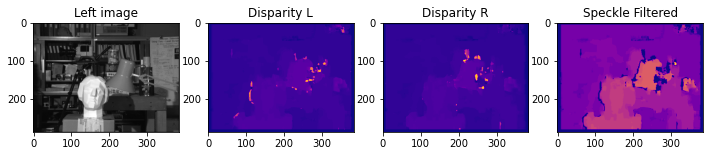

In [257]:
left = cv2.imread(r"C:\Users\Angel\computer-vision\3D\Disparity\imgs\tsukuba_l.png", cv2.IMREAD_GRAYSCALE)
right = cv2.imread(r"C:\Users\Angel\computer-vision\3D\Disparity\imgs\tsukuba_r.png", cv2.IMREAD_GRAYSCALE)
stereo = StereoBMClone(num_disparities=96, block_size=15,
                           uniqueness_ratio=15, pre_filter_cap=31,
                           speckle_window_size=35, speckle_range=3,
                           similarity="NCC", prefilter_type='hist_eq')   # choose "SAD", "NCC", "ZNCC"

dispL, dispR, disp_speckle = stereo.compute(left, right)

plt.figure(figsize=(12,4))
plt.subplot(1,4,1); plt.title("Left image"); plt.imshow(left, cmap="gray")
plt.subplot(1,4,2); plt.title("Disparity L"); plt.imshow(dispL, cmap="plasma")
plt.subplot(1,4,3); plt.title("Disparity R"); plt.imshow(dispR, cmap="plasma")
plt.subplot(1,4,4); plt.title("Speckle Filtered"); plt.imshow(disp_speckle, cmap="plasma")
plt.show()

Mean Squared Error (MSE): 6.14
Mean Absolute Error (MAE): 0.88
Bad Pixel Percentage (Lower is Better): 13.44%
Correctness on Valid Estimates (Higher is Better): 90.43%


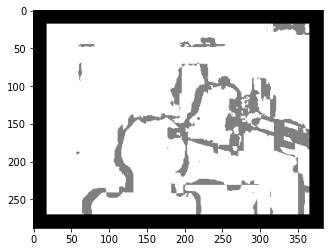

In [261]:

comparison_result = compare_disparity_maps(gt_disp/16.0, disp_speckle, bad_pixel_threshold=1)
if comparison_result:
    error_metrics, sim_map = comparison_result
    
    print(f"Mean Squared Error (MSE): {error_metrics['mse']:.2f}")
    print(f"Mean Absolute Error (MAE): {error_metrics['mae']:.2f}")
    print(f"Bad Pixel Percentage (Lower is Better): {error_metrics['bad_pixel_percentage']:.2f}%")
    print(f"Correctness on Valid Estimates (Higher is Better): {error_metrics['correct_est_percentage']:.2f}%")
    
    plt.imshow(sim_map, 'gray')

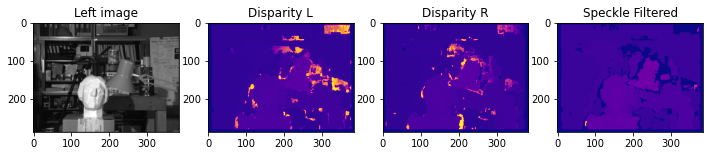

In [18]:
left = cv2.imread(r"C:\Users\Angel\computer-vision\3D\Disparity\imgs\tsukuba_l.png", cv2.IMREAD_GRAYSCALE)
right = cv2.imread(r"C:\Users\Angel\computer-vision\3D\Disparity\imgs\tsukuba_r.png", cv2.IMREAD_GRAYSCALE)
stereo = StereoBMClone(num_disparities=96, block_size=15,
                           uniqueness_ratio=15, pre_filter_cap=31,
                           speckle_window_size=35, speckle_range=3,
                           similarity="NCC", prefilter_type='sobel_eq')   # choose "SAD", "NCC", "ZNCC"

dispL, dispR, disp_speckle = stereo.compute(left, right)

plt.figure(figsize=(12,4))
plt.subplot(1,4,1); plt.title("Left image"); plt.imshow(left, cmap="gray")
plt.subplot(1,4,2); plt.title("Disparity L"); plt.imshow(dispL, cmap="plasma")
plt.subplot(1,4,3); plt.title("Disparity R"); plt.imshow(dispR, cmap="plasma")
plt.subplot(1,4,4); plt.title("Speckle Filtered"); plt.imshow(disp_speckle, cmap="plasma")
plt.show()

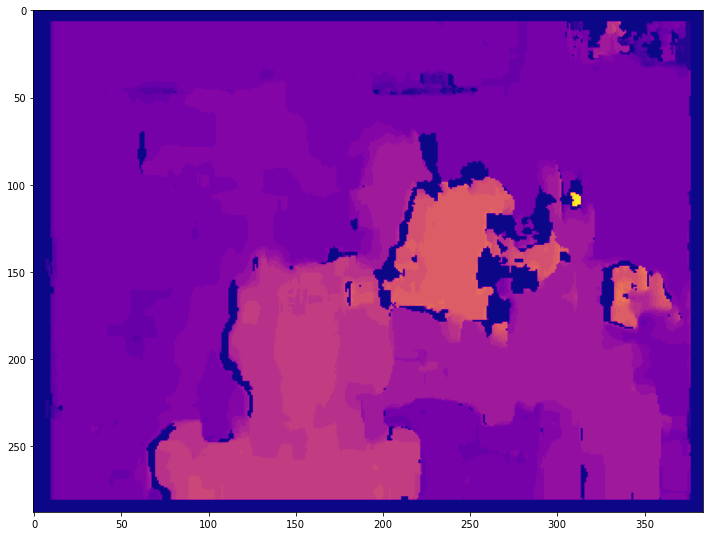

In [10]:
plt.figure(figsize=(12,12))
plt.imshow(disp_speckle, 'plasma')

In [ ]:
left = cv2.imread(r"C:\Users\Angel\computer-vision\3D\Disparity\imgs\tsukuba_l.png", cv2.IMREAD_GRAYSCALE)
right = cv2.imread(r"C:\Users\Angel\computer-vision\3D\Disparity\imgs\tsukuba_r.png", cv2.IMREAD_GRAYSCALE)
stereo = StereoBMClone(num_disparities=96, block_size=5,
                           uniqueness_ratio=15, pre_filter_cap=31,
                           speckle_window_size=35, speckle_range=3,
                           similarity="ZNCC", prefilter_type='hist_eq')   # choose "SAD", "NCC", "ZNCC"

dispL, dispR, disp_speckle = stereo.compute(left, right)

plt.figure(figsize=(12,4))
plt.subplot(1,4,1); plt.title("Left image"); plt.imshow(left, cmap="gray")
plt.subplot(1,4,2); plt.title("Disparity L"); plt.imshow(dispL, cmap="plasma")
plt.subplot(1,4,3); plt.title("Disparity R"); plt.imshow(dispR, cmap="plasma")
plt.subplot(1,4,4); plt.title("Speckle Filtered"); plt.imshow(disp_speckle, cmap="plasma")
plt.show()

Mean Squared Error (MSE): 5.73
Mean Absolute Error (MAE): 0.84
Bad Pixel Percentage (Lower is Better): 13.17%
Correctness on Valid Estimates (Higher is Better): 90.52%


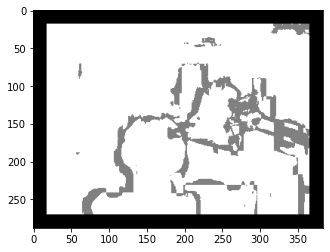

In [266]:

comparison_result = compare_disparity_maps(gt_disp/16.0, disp_speckle, bad_pixel_threshold=1)
if comparison_result:
    error_metrics, sim_map = comparison_result
    
    print(f"Mean Squared Error (MSE): {error_metrics['mse']:.2f}")
    print(f"Mean Absolute Error (MAE): {error_metrics['mae']:.2f}")
    print(f"Bad Pixel Percentage (Lower is Better): {error_metrics['bad_pixel_percentage']:.2f}%")
    print(f"Correctness on Valid Estimates (Higher is Better): {error_metrics['correct_est_percentage']:.2f}%")
    
    plt.imshow(sim_map, 'gray')

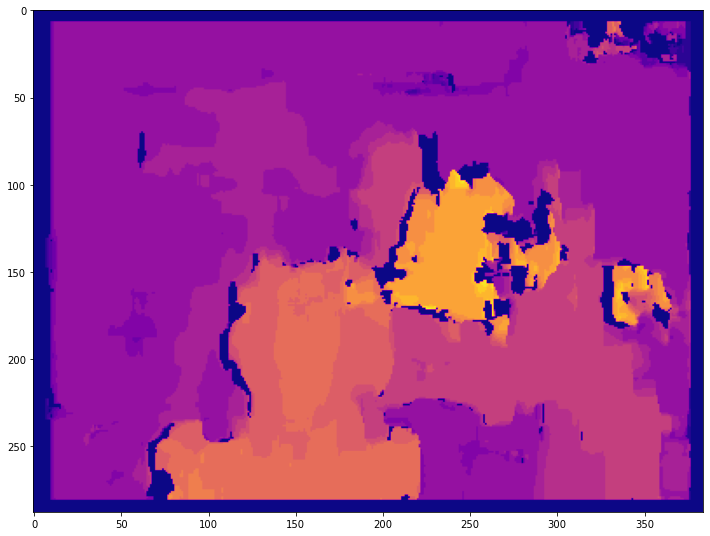

In [12]:
plt.figure(figsize=(12,12))
plt.imshow(disp_speckle, 'plasma')

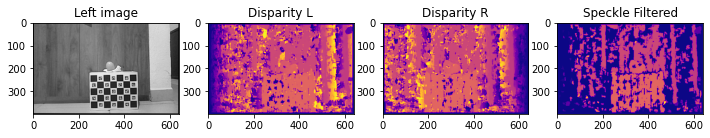

In [15]:
left = cv2.imread(r"F:\tomato_disp_data\1757292281913_left.png", cv2.IMREAD_GRAYSCALE)
right = cv2.imread(r"F:\tomato_disp_data\1757292281913_right.png", cv2.IMREAD_GRAYSCALE)

stereo = StereoBMClone(num_disparities=96, block_size=15,
                           uniqueness_ratio=15, pre_filter_cap=31,
                           speckle_window_size=35, speckle_range=3,
                           similarity="NCC", prefilter_type='sobel')   # choose "SAD", "NCC", "ZNCC"

dispL, dispR, disp_speckle = stereo.compute(left, right)

plt.figure(figsize=(12,4))
plt.subplot(1,4,1); plt.title("Left image"); plt.imshow(left, cmap="gray")
plt.subplot(1,4,2); plt.title("Disparity L"); plt.imshow(dispL, cmap="plasma")
plt.subplot(1,4,3); plt.title("Disparity R"); plt.imshow(dispR, cmap="plasma")
plt.subplot(1,4,4); plt.title("Speckle Filtered"); plt.imshow(disp_speckle, cmap="plasma")
plt.show()

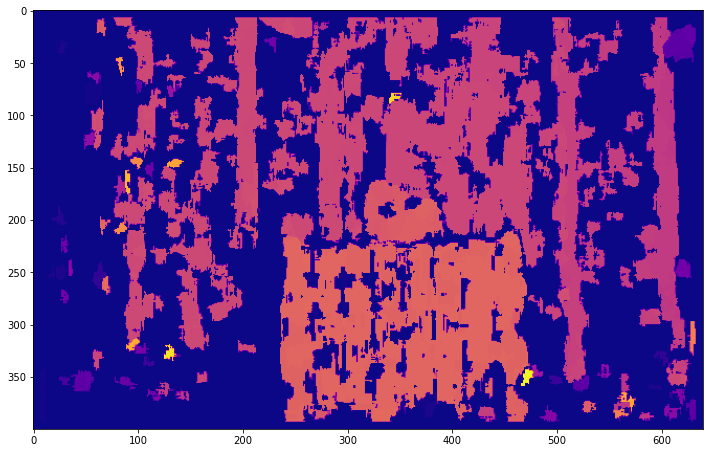

In [ ]:
plt.figure(figsize=(12,12))
plt.imshow(disp_speckle, 'plasma')

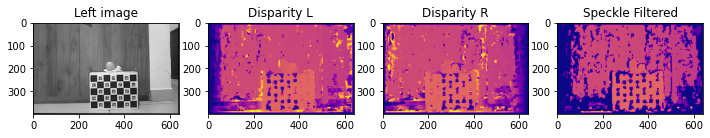

In [16]:
stereo = StereoBMClone(num_disparities=96, block_size=15,
                           uniqueness_ratio=15, pre_filter_cap=31,
                           speckle_window_size=50, speckle_range=1,
                           similarity="NCC", prefilter_type='hist_eq')   # choose "SAD", "NCC", "ZNCC"

dispL, dispR, disp_speckle = stereo.compute(left, right)

plt.figure(figsize=(12,4))
plt.subplot(1,4,1); plt.title("Left image"); plt.imshow(left, cmap="gray")
plt.subplot(1,4,2); plt.title("Disparity L"); plt.imshow(dispL, cmap="plasma")
plt.subplot(1,4,3); plt.title("Disparity R"); plt.imshow(dispR, cmap="plasma")
plt.subplot(1,4,4); plt.title("Speckle Filtered"); plt.imshow(disp_speckle, cmap="plasma")
plt.show()

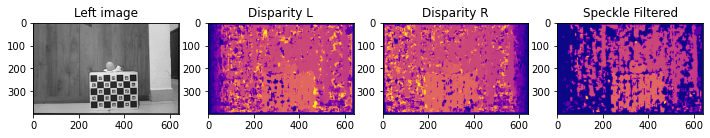

In [19]:
stereo = StereoBMClone(num_disparities=96, block_size=15,
                           uniqueness_ratio=15, pre_filter_cap=31,
                           speckle_window_size=35, speckle_range=3,
                           similarity="ZNCC")   # choose "SAD", "NCC", "ZNCC"

dispL, dispR, disp_speckle = stereo.compute(left, right)

plt.figure(figsize=(12,4))
plt.subplot(1,4,1); plt.title("Left image"); plt.imshow(left, cmap="gray")
plt.subplot(1,4,2); plt.title("Disparity L"); plt.imshow(dispL, cmap="plasma")
plt.subplot(1,4,3); plt.title("Disparity R"); plt.imshow(dispR, cmap="plasma")
plt.subplot(1,4,4); plt.title("Speckle Filtered"); plt.imshow(disp_speckle, cmap="plasma")
plt.show()

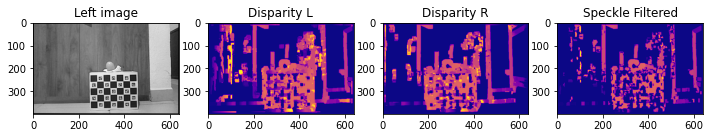

In [40]:
stereo = StereoBMClone(num_disparities=96, block_size=15,
                           uniqueness_ratio=15, pre_filter_cap=31,
                           speckle_window_size=35, speckle_range=3,
                           similarity="ZNCC", prefilter_type="canny")   # choose "SAD", "NCC", "ZNCC"

dispL, dispR, disp_speckle = stereo.compute(left, right)

plt.figure(figsize=(12,4))
plt.subplot(1,4,1); plt.title("Left image"); plt.imshow(left, cmap="gray")
plt.subplot(1,4,2); plt.title("Disparity L"); plt.imshow(dispL, cmap="plasma")
plt.subplot(1,4,3); plt.title("Disparity R"); plt.imshow(dispR, cmap="plasma")
plt.subplot(1,4,4); plt.title("Speckle Filtered"); plt.imshow(disp_speckle, cmap="plasma")
plt.show()

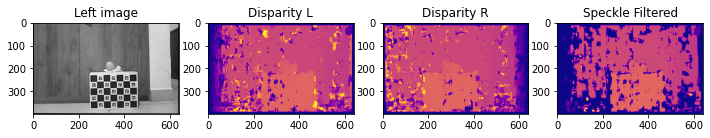

In [48]:
stereo = StereoBMClone(num_disparities=96, block_size=20,
                           uniqueness_ratio=15, pre_filter_cap=31,
                           speckle_window_size=50, speckle_range=1,
                           similarity="ZNCC", prefilter_type="sobel")   # choose "SAD", "NCC", "ZNCC"

dispL, dispR, disp_speckle = stereo.compute(left, right)

plt.figure(figsize=(12,4))
plt.subplot(1,4,1); plt.title("Left image"); plt.imshow(left, cmap="gray")
plt.subplot(1,4,2); plt.title("Disparity L"); plt.imshow(dispL, cmap="plasma")
plt.subplot(1,4,3); plt.title("Disparity R"); plt.imshow(dispR, cmap="plasma")
plt.subplot(1,4,4); plt.title("Speckle Filtered"); plt.imshow(disp_speckle, cmap="plasma")
plt.show()

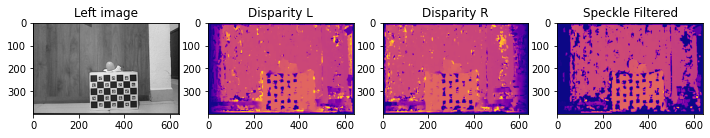

In [ ]:
stereo = StereoBMClone(num_disparities=96, block_size=15,
                           uniqueness_ratio=15, pre_filter_cap=31,
                           speckle_window_size=35, speckle_range=3,
                           similarity="ZNCC", prefilter_type="hist_eq")   # choose "SAD", "NCC", "ZNCC"

dispL, dispR, disp_speckle = stereo.compute(left, right)

plt.figure(figsize=(12,4))
plt.subplot(1,4,1); plt.title("Left image"); plt.imshow(left, cmap="gray")
plt.subplot(1,4,2); plt.title("Disparity L"); plt.imshow(dispL, cmap="plasma")
plt.subplot(1,4,3); plt.title("Disparity R"); plt.imshow(dispR, cmap="plasma")
plt.subplot(1,4,4); plt.title("Speckle Filtered"); plt.imshow(disp_speckle, cmap="plasma")
plt.show()

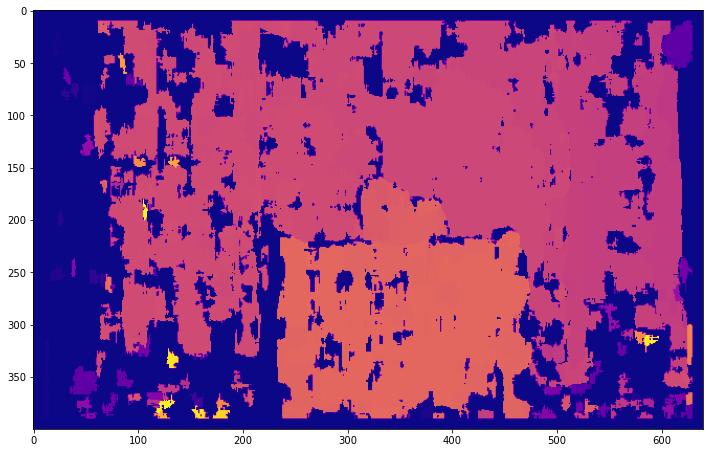

In [49]:
plt.figure(figsize=(12,12))
plt.imshow(disp_speckle, 'plasma')

HIST+SOBEL

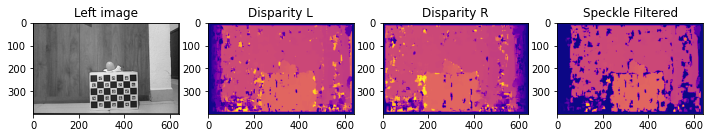

In [51]:
stereo = StereoBMClone(num_disparities=96, block_size=20,
                           uniqueness_ratio=15, pre_filter_cap=31,
                           speckle_window_size=50, speckle_range=1,
                           similarity="ZNCC", prefilter_type="sobel")   # choose "SAD", "NCC", "ZNCC"

dispL, dispR, disp_speckle = stereo.compute(left, right)

plt.figure(figsize=(12,4))
plt.subplot(1,4,1); plt.title("Left image"); plt.imshow(left, cmap="gray")
plt.subplot(1,4,2); plt.title("Disparity L"); plt.imshow(dispL, cmap="plasma")
plt.subplot(1,4,3); plt.title("Disparity R"); plt.imshow(dispR, cmap="plasma")
plt.subplot(1,4,4); plt.title("Speckle Filtered"); plt.imshow(disp_speckle, cmap="plasma")
plt.show()

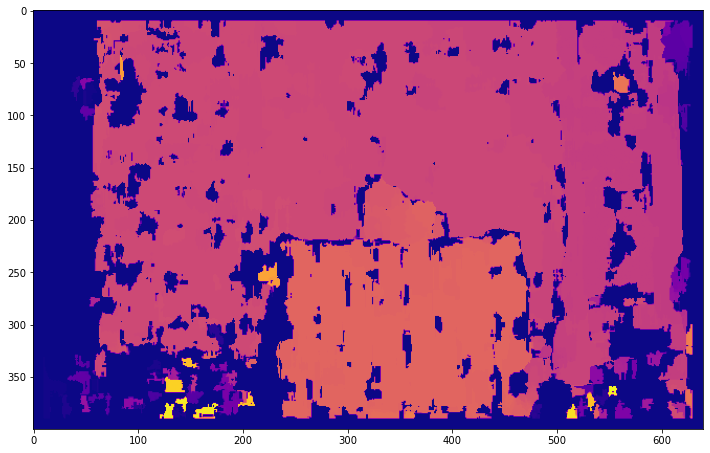

In [52]:
plt.figure(figsize=(12,12))
plt.imshow(disp_speckle, 'plasma')

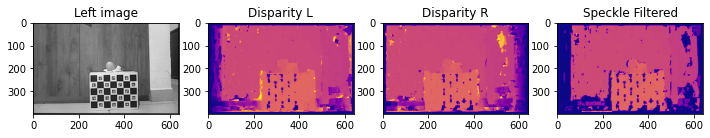

In [45]:
stereo = StereoBMClone(num_disparities=96, block_size=20,
                           uniqueness_ratio=15, pre_filter_cap=31,
                           speckle_window_size=50, speckle_range=1,
                           similarity="ZNCC", prefilter_type="canny")   # choose "SAD", "NCC", "ZNCC"

dispL, dispR, disp_speckle = stereo.compute(left, right)

plt.figure(figsize=(12,4))
plt.subplot(1,4,1); plt.title("Left image"); plt.imshow(left, cmap="gray")
plt.subplot(1,4,2); plt.title("Disparity L"); plt.imshow(dispL, cmap="plasma")
plt.subplot(1,4,3); plt.title("Disparity R"); plt.imshow(dispR, cmap="plasma")
plt.subplot(1,4,4); plt.title("Speckle Filtered"); plt.imshow(disp_speckle, cmap="plasma")
plt.show()

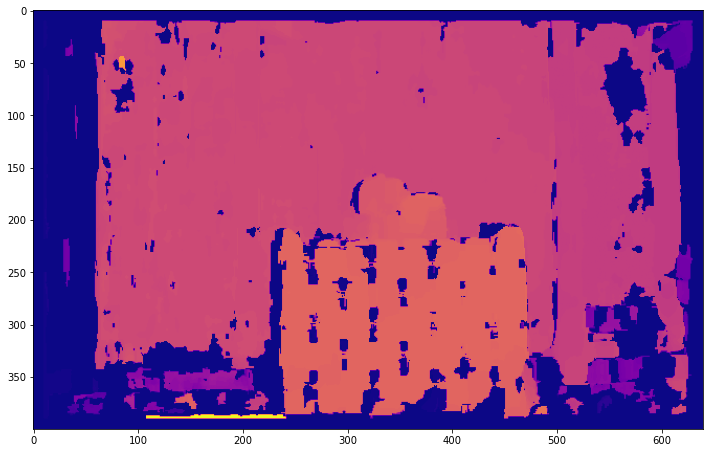

In [47]:
plt.figure(figsize=(12,12))
plt.imshow(disp_speckle, 'plasma')

Tomato

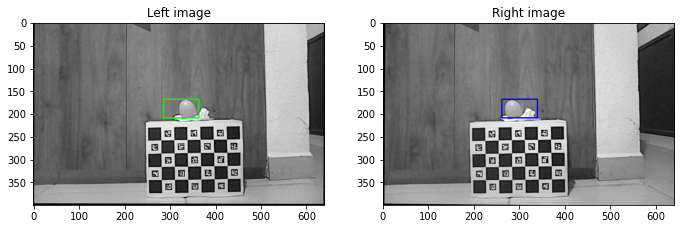

In [25]:
import cv2

left = cv2.imread(r"F:\tomato_disp_data\1757292281913_left.png", cv2.IMREAD_GRAYSCALE)
right = cv2.imread(r"F:\tomato_disp_data\1757292281913_right.png", cv2.IMREAD_GRAYSCALE)
left_bgr_img = cv2.cvtColor(left, cv2.COLOR_GRAY2BGR)
right_bgr_img = cv2.cvtColor(right, cv2.COLOR_GRAY2BGR)

# Draw a red bounding box (x1, y1, x2, y2)
l_x1, l_y1, l_x2, l_y2 = 300-15, 167, 378-15, 208
cv2.rectangle(left_bgr_img, (l_x1, l_y1), (l_x2, l_y2), (0, 255, 0), 2)
left_patch = left[l_y1:l_y2, l_x1:l_x2]

r_x1, r_y1, r_x2, r_y2 = 300-40, 167, 378-40, 208
cv2.rectangle(right_bgr_img, (r_x1, r_y1), (r_x2, r_y2), (0, 0, 255), 2)
right_patch = right[r_y1:r_y2, r_x1:r_x2]

plt.figure(figsize=(24,8))
plt.subplot(1,4,1)
plt.title("Left image")
plt.imshow(left_bgr_img)
plt.subplot(1,4,2)
plt.title("Right image")
plt.imshow(right_bgr_img)
plt.show()

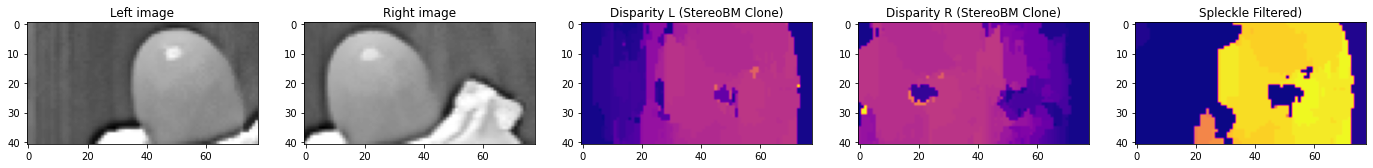

In [37]:
block_size = 15
stereo = StereoBMClone(num_disparities=96, block_size=block_size,
                           uniqueness_ratio=15, pre_filter_cap=31,
                           speckle_window_size=35, speckle_range=3,
                           similarity="ZNCC") 

half_block = block_size // 2

left_padded = cv2.copyMakeBorder(left_patch, half_block, half_block, half_block, half_block, cv2.BORDER_CONSTANT, value=0)
right_padded= cv2.copyMakeBorder(right_patch, half_block, half_block, half_block, half_block, cv2.BORDER_CONSTANT, value=0)

dispL, dispR, disp_spleckle = stereo.compute(left_padded, right_padded)

plt.figure(figsize=(24,8))
plt.subplot(1,5,1)
plt.title("Left image")
plt.imshow(left_padded[half_block:-half_block, half_block:-half_block], cmap="gray")
plt.subplot(1,5,2)
plt.title("Right image")
plt.imshow(right_padded[half_block:-half_block, half_block:-half_block], cmap="gray")
plt.subplot(1,5,3)
plt.title("Disparity L (StereoBM Clone)")
plt.imshow(dispL[half_block:-half_block, half_block:-half_block], cmap="plasma")
plt.subplot(1,5,4)
plt.title("Disparity R (StereoBM Clone)")
plt.imshow(dispR[half_block:-half_block, half_block:-half_block], cmap="plasma")
plt.subplot(1,5,5)
plt.title("Spleckle Filtered)")
plt.imshow(disp_spleckle[half_block:-half_block, half_block:-half_block], cmap="plasma")
plt.show()


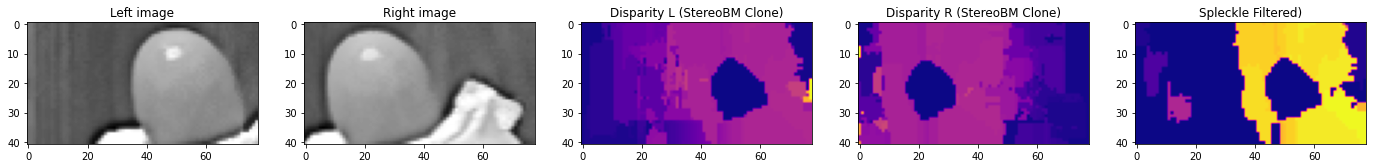

In [39]:
block_size = 15
stereo = StereoBMClone(num_disparities=96, block_size=block_size,
                      uniqueness_ratio=5, pre_filter_cap=31,
                      speckle_window_size=35, speckle_range=3,
                      similarity="ZNCC", prefilter_type="canny")

half_block = block_size // 2

left_padded = cv2.copyMakeBorder(left_patch, half_block, half_block, half_block, half_block, cv2.BORDER_CONSTANT, value=0)
right_padded= cv2.copyMakeBorder(right_patch, half_block, half_block, half_block, half_block, cv2.BORDER_CONSTANT, value=0)

dispL, dispR, disp_spleckle = stereo.compute(left_padded, right_padded)

plt.figure(figsize=(24,8))
plt.subplot(1,5,1)
plt.title("Left image")
plt.imshow(left_padded[half_block:-half_block, half_block:-half_block], cmap="gray")
plt.subplot(1,5,2)
plt.title("Right image")
plt.imshow(right_padded[half_block:-half_block, half_block:-half_block], cmap="gray")
plt.subplot(1,5,3)
plt.title("Disparity L (StereoBM Clone)")
plt.imshow(dispL[half_block:-half_block, half_block:-half_block], cmap="plasma")
plt.subplot(1,5,4)
plt.title("Disparity R (StereoBM Clone)")
plt.imshow(dispR[half_block:-half_block, half_block:-half_block], cmap="plasma")
plt.subplot(1,5,5)
plt.title("Spleckle Filtered)")
plt.imshow(disp_spleckle[half_block:-half_block, half_block:-half_block], cmap="plasma")
plt.show()

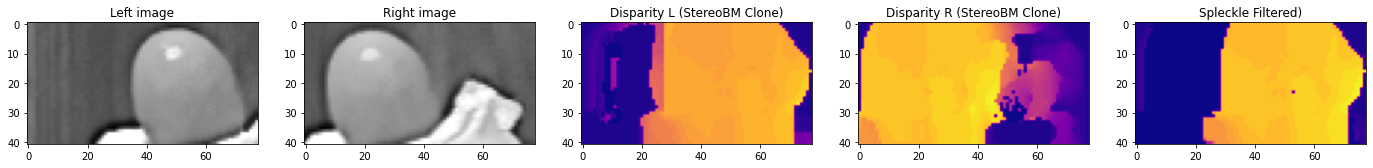

In [43]:
block_size = 15
stereo = StereoBMClone(num_disparities=96, block_size=block_size,
                      uniqueness_ratio=5, pre_filter_cap=31,
                      speckle_window_size=35, speckle_range=3,
                      similarity="ZNCC", prefilter_type="canny")

half_block = block_size // 2

left_padded = cv2.copyMakeBorder(left_patch, half_block, half_block, half_block, half_block, cv2.BORDER_CONSTANT, value=0)
right_padded= cv2.copyMakeBorder(right_patch, half_block, half_block, half_block, half_block, cv2.BORDER_CONSTANT, value=0)

dispL, dispR, disp_spleckle = stereo.compute(left_padded, right_padded)

plt.figure(figsize=(24,8))
plt.subplot(1,5,1)
plt.title("Left image")
plt.imshow(left_padded[half_block:-half_block, half_block:-half_block], cmap="gray")
plt.subplot(1,5,2)
plt.title("Right image")
plt.imshow(right_padded[half_block:-half_block, half_block:-half_block], cmap="gray")
plt.subplot(1,5,3)
plt.title("Disparity L (StereoBM Clone)")
plt.imshow(dispL[half_block:-half_block, half_block:-half_block], cmap="plasma")
plt.subplot(1,5,4)
plt.title("Disparity R (StereoBM Clone)")
plt.imshow(dispR[half_block:-half_block, half_block:-half_block], cmap="plasma")
plt.subplot(1,5,5)
plt.title("Spleckle Filtered)")
plt.imshow(disp_spleckle[half_block:-half_block, half_block:-half_block], cmap="plasma")
plt.show()

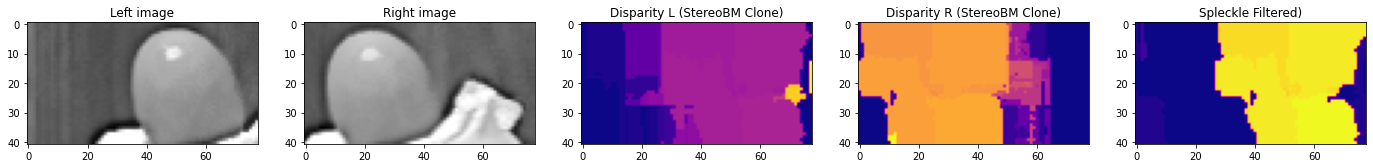

In [34]:
block_size = 25
stereo = StereoBMClone(num_disparities=96, block_size=block_size,
                      uniqueness_ratio=5, pre_filter_cap=31,
                      speckle_window_size=35, speckle_range=3,
                      similarity="ZNCC", prefilter_type="canny")

half_block = block_size // 2

left_padded = cv2.copyMakeBorder(left_patch, half_block, half_block, half_block, half_block, cv2.BORDER_CONSTANT, value=0)
right_padded= cv2.copyMakeBorder(right_patch, half_block, half_block, half_block, half_block, cv2.BORDER_CONSTANT, value=0)

dispL, dispR, disp_spleckle = stereo.compute(left_padded, right_padded)

plt.figure(figsize=(24,8))
plt.subplot(1,5,1)
plt.title("Left image")
plt.imshow(left_padded[half_block:-half_block, half_block:-half_block], cmap="gray")
plt.subplot(1,5,2)
plt.title("Right image")
plt.imshow(right_padded[half_block:-half_block, half_block:-half_block], cmap="gray")
plt.subplot(1,5,3)
plt.title("Disparity L (StereoBM Clone)")
plt.imshow(dispL[half_block:-half_block, half_block:-half_block], cmap="plasma")
plt.subplot(1,5,4)
plt.title("Disparity R (StereoBM Clone)")
plt.imshow(dispR[half_block:-half_block, half_block:-half_block], cmap="plasma")
plt.subplot(1,5,5)
plt.title("Spleckle Filtered)")
plt.imshow(disp_spleckle[half_block:-half_block, half_block:-half_block], cmap="plasma")
plt.show()

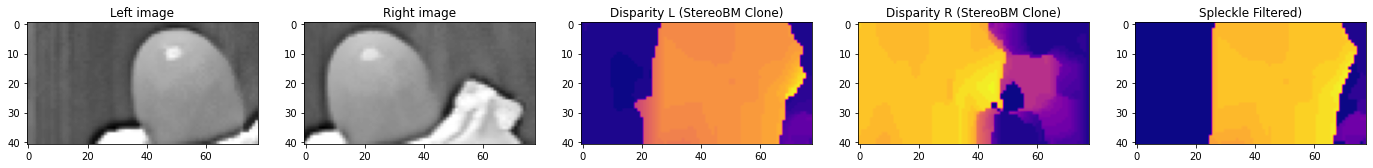

In [46]:
block_size = 25
stereo = StereoBMClone(num_disparities=96, block_size=block_size,
                      uniqueness_ratio=15, pre_filter_cap=31,
                      speckle_window_size=35, speckle_range=3,
                      similarity="ZNCC", prefilter_type="canny")

half_block = block_size // 2

left_padded = cv2.copyMakeBorder(left_patch, half_block, half_block, half_block, half_block, cv2.BORDER_CONSTANT, value=0)
right_padded= cv2.copyMakeBorder(right_patch, half_block, half_block, half_block, half_block, cv2.BORDER_CONSTANT, value=0)

dispL, dispR, disp_spleckle = stereo.compute(left_padded, right_padded)

plt.figure(figsize=(24,8))
plt.subplot(1,5,1)
plt.title("Left image")
plt.imshow(left_padded[half_block:-half_block, half_block:-half_block], cmap="gray")
plt.subplot(1,5,2)
plt.title("Right image")
plt.imshow(right_padded[half_block:-half_block, half_block:-half_block], cmap="gray")
plt.subplot(1,5,3)
plt.title("Disparity L (StereoBM Clone)")
plt.imshow(dispL[half_block:-half_block, half_block:-half_block], cmap="plasma")
plt.subplot(1,5,4)
plt.title("Disparity R (StereoBM Clone)")
plt.imshow(dispR[half_block:-half_block, half_block:-half_block], cmap="plasma")
plt.subplot(1,5,5)
plt.title("Spleckle Filtered)")
plt.imshow(disp_spleckle[half_block:-half_block, half_block:-half_block], cmap="plasma")
plt.show()